<a href="https://colab.research.google.com/github/zohanNoorHasan/Data-Aalysis/blob/main/covid_data_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/covid_data_collection/owid-covid-data.csv') 

In [ ]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
#set(data.head())

data.min()

In [ ]:
data.isnull().sum()

iso_code                                        0
continent                                    9852
location                                        0
date                                            0
total_cases                                  3016
                                            ...  
human_development_index                     29744
excess_mortality_cumulative_absolute       158820
excess_mortality_cumulative                158820
excess_mortality                           158820
excess_mortality_cumulative_per_million    158820
Length: 67, dtype: int64

In [ ]:
asia_country=data[(data['continent']=='Asia') & (data['location'])]


In [ ]:
print(data.dtypes)

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object


In [ ]:
data.shape

(164482, 67)

In [ ]:
new_data=data[['location','date','total_cases','new_cases','new_deaths','total_deaths']]

In [ ]:
#new_data.shape

In [ ]:
#set(new_data['date'])

In [ ]:
# Highly populated coutries 

To see the unique location

In [ ]:
update_dataset= new_data [(new_data['location'] == "Bangladesh") | (new_data['location'] == "Vietnam") | (new_data['location'] == "Philippines") | (new_data['location'] == "Mexico") |(new_data['location'] == "Indonesia")] 
update_dataset


,location,date,total_cases,new_cases,new_deaths,total_deaths
12478,Bangladesh,2020-03-03,NaN,NaN,NaN,NaN
12479,Bangladesh,2020-03-04,NaN,NaN,NaN,NaN
12480,Bangladesh,2020-03-05,NaN,NaN,NaN,NaN
12481,Bangladesh,2020-03-06,NaN,NaN,NaN,NaN
12482,Bangladesh,2020-03-07,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
161111,Vietnam,2022-02-21,2834373.0,46880.0,104.0,39605.0
161112,Vietnam,2022-02-22,2890522.0,56149.0,77.0,39682.0
161113,Vietnam,2022-02-23,2972378.0,81856.0,91.0,39773.0
161114,Vietnam,2022-02-24,3041506.0,69128.0,111.0,39884.0


In [ ]:
update_dataset.shape

(3761, 6)

In [ ]:
update_dataset.isnull().sum()


location          0
date              0
total_cases      63
new_cases        63
new_deaths      296
total_deaths    295
dtype: int64

In [ ]:
#set(update_dataset['total_cases'])


In [ ]:
#update_datase=update_dataset.fillna(value=update_dataset['total_cases'].mean())
#update_dataset=update_dataset.fillna(update_dataset.mean())
update_dataset['total_cases']=update_dataset['total_cases'].interpolate(method='linear')
update_dataset['new_cases']=update_dataset['new_cases'].interpolate(method='linear')
update_dataset['new_deaths']=update_dataset['new_deaths'].interpolate(method='linear')
update_dataset['total_deaths']=update_dataset['total_deaths'].interpolate(method='linear')
update_dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,location,date,total_cases,new_cases,new_deaths,total_deaths
12478,Bangladesh,2020-03-03,NaN,NaN,NaN,NaN
12479,Bangladesh,2020-03-04,NaN,NaN,NaN,NaN
12480,Bangladesh,2020-03-05,NaN,NaN,NaN,NaN
12481,Bangladesh,2020-03-06,NaN,NaN,NaN,NaN
12482,Bangladesh,2020-03-07,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
161111,Vietnam,2022-02-21,2834373.0,46880.0,104.0,39605.0
161112,Vietnam,2022-02-22,2890522.0,56149.0,77.0,39682.0
161113,Vietnam,2022-02-23,2972378.0,81856.0,91.0,39773.0
161114,Vietnam,2022-02-24,3041506.0,69128.0,111.0,39884.0


In [ ]:
update_dataset.isnull().sum()


location         0
date             0
total_cases      5
new_cases        5
new_deaths      15
total_deaths    15
dtype: int64

In [ ]:
update_dataset=update_dataset.fillna(update_dataset.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
update_dataset

,location,date,total_cases,new_cases,new_deaths,total_deaths
12478,Bangladesh,2020-03-03,1.210282e+06,5617.982961,160.825681,52843.554592
12479,Bangladesh,2020-03-04,1.210282e+06,5617.982961,160.825681,52843.554592
12480,Bangladesh,2020-03-05,1.210282e+06,5617.982961,160.825681,52843.554592
12481,Bangladesh,2020-03-06,1.210282e+06,5617.982961,160.825681,52843.554592
12482,Bangladesh,2020-03-07,1.210282e+06,5617.982961,160.825681,52843.554592
...,...,...,...,...,...,...
161111,Vietnam,2022-02-21,2.834373e+06,46880.000000,104.000000,39605.000000
161112,Vietnam,2022-02-22,2.890522e+06,56149.000000,77.000000,39682.000000
161113,Vietnam,2022-02-23,2.972378e+06,81856.000000,91.000000,39773.000000
161114,Vietnam,2022-02-24,3.041506e+06,69128.000000,111.000000,39884.000000


In [ ]:
#set(update_dataset['total_cases'])

In [ ]:
update_dataset.isnull().sum()

location        0
date            0
total_cases     0
new_cases       0
new_deaths      0
total_deaths    0
dtype: int64

In [ ]:
update_dataset.shape

(3761, 6)

In [ ]:
#bagladesh temparature dataset

In [ ]:
Bangladesh_temp = pd.read_csv('/content/drive/MyDrive/covid_data_collection/Bangladesh_temp.csv') 

In [ ]:
Bangladesh_temp.head()


,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR
0,2020,2,20,21.78,12.30,17.04,19.83,11.85,27.68,15.83,8.85,56.50,0.0
1,2020,2,21,21.62,13.14,17.38,20.37,13.27,28.06,14.79,9.34,61.19,0.0
2,2020,2,22,22.26,13.51,17.88,21.03,12.45,29.00,16.55,9.52,59.44,0.0
3,2020,2,23,23.26,15.79,19.52,22.25,10.95,29.10,18.15,11.05,64.19,0.0
4,2020,2,24,23.08,16.27,19.68,22.49,10.74,28.55,17.80,11.41,67.25,0.0


In [ ]:
print(Bangladesh_temp.dtypes)

YEAR             int64
MO               int64
DY               int64
T2M            float64
T2MDEW         float64
T2MWET         float64
TS             float64
T2M_RANGE      float64
T2M_MAX        float64
T2M_MIN        float64
QV2M           float64
RH2M           float64
PRECTOTCORR    float64
dtype: object


In [ ]:
Bangladesh_temp['MO']=Bangladesh_temp.MO.astype(str)
Bangladesh_temp['DY']=Bangladesh_temp.DY.astype(str)
Bangladesh_temp['MO'].replace(['1','2','3','4','5','6','7','8','9'],['01','02','03','04','05','06','07','08','09'],inplace=True)
Bangladesh_temp['DY'].replace(['1','2','3','4','5','6','7','8','9'],['01','02','03','04','05','06','07','08','09'],inplace=True)


In [ ]:
set(Bangladesh_temp['MO'])


{'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'}

In [ ]:
#tt = list(Bangladesh_temp.columns)
#tt

In [ ]:

Bangladesh_temp['date'] = Bangladesh_temp['YEAR'].astype(str) + '-' + Bangladesh_temp['MO'].astype(str) + '-' + Bangladesh_temp['DY'].astype(str)
Bangladesh_temp

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,date
0,2020,02,20,21.78,12.30,17.04,19.83,11.85,27.68,15.83,8.85,56.50,0.00,2020-02-20
1,2020,02,21,21.62,13.14,17.38,20.37,13.27,28.06,14.79,9.34,61.19,0.00,2020-02-21
2,2020,02,22,22.26,13.51,17.88,21.03,12.45,29.00,16.55,9.52,59.44,0.00,2020-02-22
3,2020,02,23,23.26,15.79,19.52,22.25,10.95,29.10,18.15,11.05,64.19,0.00,2020-02-23
4,2020,02,24,23.08,16.27,19.68,22.49,10.74,28.55,17.80,11.41,67.25,0.00,2020-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,2022,02,18,18.79,11.28,15.03,18.15,13.10,25.73,12.63,8.30,64.69,0.00,2022-02-18
730,2022,02,19,19.39,11.07,15.23,18.54,13.02,26.51,13.48,8.18,60.88,0.00,2022-02-19
731,2022,02,20,19.99,13.44,16.71,19.67,13.04,26.44,13.40,9.64,68.38,3.10,2022-02-20
732,2022,02,21,20.16,14.05,17.11,20.26,11.28,26.09,14.81,9.95,70.88,0.22,2022-02-21


In [ ]:
#tt[0],tt[2] = tt[2],tt[0]
#tt

In [ ]:
#Bangladesh_temp = Bangladesh_temp[tt]

#Bangladesh_temp 

In [ ]:
#Bangladesh_temp[date] =pd.to_datetime(Bangladesh_temp[['DY','MO','YEAR']])
#Bangladesh_temp

In [ ]:
Bangladesh_temp

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,date
0,2020,02,20,21.78,12.30,17.04,19.83,11.85,27.68,15.83,8.85,56.50,0.00,2020-02-20
1,2020,02,21,21.62,13.14,17.38,20.37,13.27,28.06,14.79,9.34,61.19,0.00,2020-02-21
2,2020,02,22,22.26,13.51,17.88,21.03,12.45,29.00,16.55,9.52,59.44,0.00,2020-02-22
3,2020,02,23,23.26,15.79,19.52,22.25,10.95,29.10,18.15,11.05,64.19,0.00,2020-02-23
4,2020,02,24,23.08,16.27,19.68,22.49,10.74,28.55,17.80,11.41,67.25,0.00,2020-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,2022,02,18,18.79,11.28,15.03,18.15,13.10,25.73,12.63,8.30,64.69,0.00,2022-02-18
730,2022,02,19,19.39,11.07,15.23,18.54,13.02,26.51,13.48,8.18,60.88,0.00,2022-02-19
731,2022,02,20,19.99,13.44,16.71,19.67,13.04,26.44,13.40,9.64,68.38,3.10,2022-02-20
732,2022,02,21,20.16,14.05,17.11,20.26,11.28,26.09,14.81,9.95,70.88,0.22,2022-02-21


In [ ]:
Bangladesh_temp=Bangladesh_temp[['date','T2M']]
Bangladesh_temp

,date,T2M
0,2020-02-20,21.78
1,2020-02-21,21.62
2,2020-02-22,22.26
3,2020-02-23,23.26
4,2020-02-24,23.08
...,...,...
729,2022-02-18,18.79
730,2022-02-19,19.39
731,2022-02-20,19.99
732,2022-02-21,20.16


In [ ]:
Bangladesh_temp['location']='Bangladesh'
Bangladesh_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,T2M,location
0,2020-02-20,21.78,Bangladesh
1,2020-02-21,21.62,Bangladesh
2,2020-02-22,22.26,Bangladesh
3,2020-02-23,23.26,Bangladesh
4,2020-02-24,23.08,Bangladesh
...,...,...,...
729,2022-02-18,18.79,Bangladesh
730,2022-02-19,19.39,Bangladesh
731,2022-02-20,19.99,Bangladesh
732,2022-02-21,20.16,Bangladesh


In [ ]:
#set(Bangladesh_temp['date'])

In [ ]:
#canada datetime temparature

In [ ]:
Indonesia_temp = pd.read_csv('/content/drive/MyDrive/covid_data_collection/indo_temp.csv') 
Indonesia_temp

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR
0,2020,2,24,23.87,22.18,23.02,23.71,6.39,27.66,21.27,18.19,90.81,11.94
1,2020,2,25,23.55,22.20,22.87,23.40,4.30,26.30,22.00,18.19,92.38,1.16
2,2020,2,26,22.64,22.26,22.45,22.58,2.98,24.27,21.29,18.25,97.62,9.37
3,2020,2,27,22.81,21.33,22.07,22.80,6.66,26.81,20.15,17.27,91.81,4.65
4,2020,2,28,22.48,22.15,22.31,22.45,2.62,23.90,21.28,18.13,97.94,15.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2022,2,21,20.90,18.51,19.71,20.77,6.56,24.35,17.78,14.47,87.31,1.99
729,2022,2,22,21.70,19.74,20.72,21.48,8.16,25.89,17.73,15.69,89.44,6.88
730,2022,2,23,22.22,20.33,21.28,21.98,7.25,26.53,19.28,16.17,90.00,7.28
731,2022,2,24,22.01,20.38,21.19,21.84,7.02,26.31,19.30,16.24,91.31,13.82


In [ ]:
Indonesia_temp['MO']=Indonesia_temp.MO.astype(str)
Indonesia_temp['DY']=Indonesia_temp.DY.astype(str)
Indonesia_temp['MO'].replace(['1','2','3','4','5','6','7','8','9'],['01','02','03','04','05','06','07','08','09'],inplace=True)
Indonesia_temp['DY'].replace(['1','2','3','4','5','6','7','8','9'],['01','02','03','04','05','06','07','08','09'],inplace=True)


In [ ]:

Indonesia_temp['date'] = Indonesia_temp['YEAR'].astype(str) + '-' + Indonesia_temp['MO'].astype(str) + '-' + Indonesia_temp['DY'].astype(str)
Indonesia_temp

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,date
0,2020,02,24,23.87,22.18,23.02,23.71,6.39,27.66,21.27,18.19,90.81,11.94,2020-02-24
1,2020,02,25,23.55,22.20,22.87,23.40,4.30,26.30,22.00,18.19,92.38,1.16,2020-02-25
2,2020,02,26,22.64,22.26,22.45,22.58,2.98,24.27,21.29,18.25,97.62,9.37,2020-02-26
3,2020,02,27,22.81,21.33,22.07,22.80,6.66,26.81,20.15,17.27,91.81,4.65,2020-02-27
4,2020,02,28,22.48,22.15,22.31,22.45,2.62,23.90,21.28,18.13,97.94,15.49,2020-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2022,02,21,20.90,18.51,19.71,20.77,6.56,24.35,17.78,14.47,87.31,1.99,2022-02-21
729,2022,02,22,21.70,19.74,20.72,21.48,8.16,25.89,17.73,15.69,89.44,6.88,2022-02-22
730,2022,02,23,22.22,20.33,21.28,21.98,7.25,26.53,19.28,16.17,90.00,7.28,2022-02-23
731,2022,02,24,22.01,20.38,21.19,21.84,7.02,26.31,19.30,16.24,91.31,13.82,2022-02-24


In [ ]:
Indonesia_temp=Indonesia_temp[['date','T2M']]
Indonesia_temp

,date,T2M
0,2020-02-24,23.87
1,2020-02-25,23.55
2,2020-02-26,22.64
3,2020-02-27,22.81
4,2020-02-28,22.48
...,...,...
728,2022-02-21,20.90
729,2022-02-22,21.70
730,2022-02-23,22.22
731,2022-02-24,22.01


In [ ]:
Indonesia_temp['location']='Indonesia'
Indonesia_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,T2M,location
0,2020-02-24,23.87,Indonesia
1,2020-02-25,23.55,Indonesia
2,2020-02-26,22.64,Indonesia
3,2020-02-27,22.81,Indonesia
4,2020-02-28,22.48,Indonesia
...,...,...,...
728,2022-02-21,20.90,Indonesia
729,2022-02-22,21.70,Indonesia
730,2022-02-23,22.22,Indonesia
731,2022-02-24,22.01,Indonesia


In [ ]:
#France date and temparatrure

In [ ]:
Vietnam_temp = pd.read_csv('/content/drive/MyDrive/covid_data_collection/vietnam_temp.csv') 
#Vietnam_temp


In [ ]:
Vietnam_temp['MO']=Vietnam_temp.MO.astype(str)
Vietnam_temp['DY']=Vietnam_temp.DY.astype(str)
Vietnam_temp['MO'].replace(['1','2','3','4','5','6','7','8','9'],['01','02','03','04','05','06','07','08','09'],inplace=True)
Vietnam_temp['DY'].replace(['1','2','3','4','5','6','7','8','9'],['01','02','03','04','05','06','07','08','09'],inplace=True)

In [ ]:
Vietnam_temp['date'] = Vietnam_temp['YEAR'].astype(str) + '-' + Vietnam_temp['MO'].astype(str) + '-' + Vietnam_temp['DY'].astype(str)
#Vietnam_temp

In [ ]:
Vietnam_temp=Vietnam_temp[['date','T2M']]
#Vietnam_temp


In [ ]:
Vietnam_temp['location']='Vietnam'
Vietnam_temp

,date,T2M,location
0,2020-02-24,19.26,Vietnam
1,2020-02-25,20.93,Vietnam
2,2020-02-26,21.61,Vietnam
3,2020-02-27,20.84,Vietnam
4,2020-02-28,21.24,Vietnam
...,...,...,...
725,2022-02-18,23.37,Vietnam
726,2022-02-19,24.43,Vietnam
727,2022-02-20,21.64,Vietnam
728,2022-02-21,18.63,Vietnam


In [ ]:
#mexico dataset and temparature

In [ ]:
mexico_temp = pd.read_csv('/content/drive/MyDrive/covid_data_collection/Mexico_temp.csv') 
mexico_temp

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR
0,2020,2,22,15.19,10.89,13.04,16.46,10.96,22.08,11.12,9.58,78.62,0.02
1,2020,2,23,14.40,9.98,12.19,15.60,10.09,20.81,10.73,9.03,77.50,0.24
2,2020,2,24,14.43,9.64,12.03,14.51,12.81,21.39,8.58,8.85,76.12,2.23
3,2020,2,25,15.96,10.22,13.08,16.13,12.27,22.96,10.69,9.22,72.44,1.15
4,2020,2,26,17.23,10.99,14.11,17.47,13.20,24.65,11.45,9.70,71.25,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2022,2,18,15.97,12.13,14.05,15.76,11.28,22.26,10.98,10.68,80.94,1.11
728,2022,2,19,15.30,10.53,12.92,15.37,15.95,23.36,7.40,9.58,77.50,5.32
729,2022,2,20,4.58,1.50,3.04,5.58,5.10,7.10,2.00,5.07,80.88,5.64
730,2022,2,21,5.90,3.35,4.62,6.94,9.73,11.34,1.62,5.80,84.56,6.51


In [ ]:
mexico_temp['MO']=mexico_temp.MO.astype(str)
mexico_temp['DY']=mexico_temp.DY.astype(str)
mexico_temp['MO'].replace(['1','2','3','4','5','6','7','8','9'],['01','02','03','04','05','06','07','08','09'],inplace=True)
mexico_temp['DY'].replace(['1','2','3','4','5','6','7','8','9'],['01','02','03','04','05','06','07','08','09'],inplace=True)

In [ ]:
mexico_temp['date'] = mexico_temp['YEAR'].astype(str) + '-' + mexico_temp['MO'].astype(str) + '-' + mexico_temp['DY'].astype(str)
mexico_temp

,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,date
0,2020,02,22,15.19,10.89,13.04,16.46,10.96,22.08,11.12,9.58,78.62,0.02,2020-02-22
1,2020,02,23,14.40,9.98,12.19,15.60,10.09,20.81,10.73,9.03,77.50,0.24,2020-02-23
2,2020,02,24,14.43,9.64,12.03,14.51,12.81,21.39,8.58,8.85,76.12,2.23,2020-02-24
3,2020,02,25,15.96,10.22,13.08,16.13,12.27,22.96,10.69,9.22,72.44,1.15,2020-02-25
4,2020,02,26,17.23,10.99,14.11,17.47,13.20,24.65,11.45,9.70,71.25,0.04,2020-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2022,02,18,15.97,12.13,14.05,15.76,11.28,22.26,10.98,10.68,80.94,1.11,2022-02-18
728,2022,02,19,15.30,10.53,12.92,15.37,15.95,23.36,7.40,9.58,77.50,5.32,2022-02-19
729,2022,02,20,4.58,1.50,3.04,5.58,5.10,7.10,2.00,5.07,80.88,5.64,2022-02-20
730,2022,02,21,5.90,3.35,4.62,6.94,9.73,11.34,1.62,5.80,84.56,6.51,2022-02-21


In [ ]:
mexico_temp=mexico_temp[['date','T2M']]
mexico_temp


,date,T2M
0,2020-02-22,15.19
1,2020-02-23,14.40
2,2020-02-24,14.43
3,2020-02-25,15.96
4,2020-02-26,17.23
...,...,...
727,2022-02-18,15.97
728,2022-02-19,15.30
729,2022-02-20,4.58
730,2022-02-21,5.90


In [ ]:
mexico_temp['location']='Mexico'
mexico_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,T2M,location
0,2020-02-22,15.19,Mexico
1,2020-02-23,14.40,Mexico
2,2020-02-24,14.43,Mexico
3,2020-02-25,15.96,Mexico
4,2020-02-26,17.23,Mexico
...,...,...,...
727,2022-02-18,15.97,Mexico
728,2022-02-19,15.30,Mexico
729,2022-02-20,4.58,Mexico
730,2022-02-21,5.90,Mexico


In [ ]:
#Philippines_temp dataset and temparature

In [ ]:
Philippines_temp = pd.read_csv('/content/drive/MyDrive/covid_data_collection/phi_temp.csv') 
Philippines_temp


,YEAR,MO,DY,QV2M,RH2M,PRECTOTCORR,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN
0,2020,2,24,18.37,85.50,2.13,26.47,23.87,25.16,26.33,1.58,27.32,25.74
1,2020,2,25,17.21,79.50,1.01,26.62,22.77,24.69,26.36,1.43,27.44,26.01
2,2020,2,26,17.52,82.12,1.07,26.40,23.12,24.76,26.42,1.38,27.01,25.64
3,2020,2,27,17.46,81.00,0.97,26.52,23.01,24.77,26.58,1.41,27.33,25.90
4,2020,2,28,17.64,82.44,1.26,26.44,23.21,24.83,26.53,1.60,27.32,25.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2022,2,21,18.62,83.75,2.00,27.03,24.06,25.55,27.21,1.30,27.69,26.40
729,2022,2,22,18.92,84.75,5.10,27.12,24.36,25.73,27.18,1.13,27.69,26.56
730,2022,2,23,18.62,82.88,1.20,27.25,24.11,25.68,27.19,1.50,28.15,26.65
731,2022,2,24,18.19,81.12,2.09,27.20,23.73,25.47,27.29,1.70,28.27,26.57


In [ ]:
Philippines_temp['MO']=Philippines_temp.MO.astype(str)
Philippines_temp['DY']=Philippines_temp.DY.astype(str)
Philippines_temp['MO'].replace(['1','2','3','4','5','6','7','8','9'],['01','02','03','04','05','06','07','08','09'],inplace=True)
Philippines_temp['DY'].replace(['1','2','3','4','5','6','7','8','9'],['01','02','03','04','05','06','07','08','09'],inplace=True)

In [ ]:
Philippines_temp['date'] = Philippines_temp['YEAR'].astype(str) + '-' + Philippines_temp['MO'].astype(str) + '-' + Philippines_temp['DY'].astype(str)
Philippines_temp

,YEAR,MO,DY,QV2M,RH2M,PRECTOTCORR,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,date
0,2020,02,24,18.37,85.50,2.13,26.47,23.87,25.16,26.33,1.58,27.32,25.74,2020-02-24
1,2020,02,25,17.21,79.50,1.01,26.62,22.77,24.69,26.36,1.43,27.44,26.01,2020-02-25
2,2020,02,26,17.52,82.12,1.07,26.40,23.12,24.76,26.42,1.38,27.01,25.64,2020-02-26
3,2020,02,27,17.46,81.00,0.97,26.52,23.01,24.77,26.58,1.41,27.33,25.90,2020-02-27
4,2020,02,28,17.64,82.44,1.26,26.44,23.21,24.83,26.53,1.60,27.32,25.71,2020-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2022,02,21,18.62,83.75,2.00,27.03,24.06,25.55,27.21,1.30,27.69,26.40,2022-02-21
729,2022,02,22,18.92,84.75,5.10,27.12,24.36,25.73,27.18,1.13,27.69,26.56,2022-02-22
730,2022,02,23,18.62,82.88,1.20,27.25,24.11,25.68,27.19,1.50,28.15,26.65,2022-02-23
731,2022,02,24,18.19,81.12,2.09,27.20,23.73,25.47,27.29,1.70,28.27,26.57,2022-02-24


In [ ]:
Philippines_temp=Philippines_temp[['date','T2M']]
Philippines_temp

,date,T2M
0,2020-02-24,26.47
1,2020-02-25,26.62
2,2020-02-26,26.40
3,2020-02-27,26.52
4,2020-02-28,26.44
...,...,...
728,2022-02-21,27.03
729,2022-02-22,27.12
730,2022-02-23,27.25
731,2022-02-24,27.20


In [ ]:
Philippines_temp['location']='Philippines'
Philippines_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,T2M,location
0,2020-02-24,26.47,Philippines
1,2020-02-25,26.62,Philippines
2,2020-02-26,26.40,Philippines
3,2020-02-27,26.52,Philippines
4,2020-02-28,26.44,Philippines
...,...,...,...
728,2022-02-21,27.03,Philippines
729,2022-02-22,27.12,Philippines
730,2022-02-23,27.25,Philippines
731,2022-02-24,27.20,Philippines


In [ ]:
#****************combining datasets*************

In [ ]:

final_dataset_bangladesh=pd.merge(update_dataset,Bangladesh_temp, on=['location','date'])
final_dataset_bangladesh['date']=pd.to_datetime(final_dataset_bangladesh['date'])
#final_dataset_bangladesh

In [ ]:
set(final_dataset_bangladesh['date'])

{Timestamp('2020-03-03 00:00:00'),
 Timestamp('2020-03-04 00:00:00'),
 Timestamp('2020-03-05 00:00:00'),
 Timestamp('2020-03-06 00:00:00'),
 Timestamp('2020-03-07 00:00:00'),
 Timestamp('2020-03-08 00:00:00'),
 Timestamp('2020-03-09 00:00:00'),
 Timestamp('2020-03-10 00:00:00'),
 Timestamp('2020-03-11 00:00:00'),
 Timestamp('2020-03-12 00:00:00'),
 Timestamp('2020-03-13 00:00:00'),
 Timestamp('2020-03-14 00:00:00'),
 Timestamp('2020-03-15 00:00:00'),
 Timestamp('2020-03-16 00:00:00'),
 Timestamp('2020-03-17 00:00:00'),
 Timestamp('2020-03-18 00:00:00'),
 Timestamp('2020-03-19 00:00:00'),
 Timestamp('2020-03-20 00:00:00'),
 Timestamp('2020-03-21 00:00:00'),
 Timestamp('2020-03-22 00:00:00'),
 Timestamp('2020-03-23 00:00:00'),
 Timestamp('2020-03-24 00:00:00'),
 Timestamp('2020-03-25 00:00:00'),
 Timestamp('2020-03-26 00:00:00'),
 Timestamp('2020-03-27 00:00:00'),
 Timestamp('2020-03-28 00:00:00'),
 Timestamp('2020-03-29 00:00:00'),
 Timestamp('2020-03-30 00:00:00'),
 Timestamp('2020-03-

In [ ]:
final_dataset_mexico=pd.merge(update_dataset,mexico_temp, on=['location','date'])
final_dataset_mexico['date']=pd.to_datetime(final_dataset_mexico['date'])

In [ ]:
final_dataset_Vietnam=pd.merge(update_dataset,Vietnam_temp, on=['location','date'])
final_dataset_Vietnam['date']=pd.to_datetime(final_dataset_Vietnam['date'])

In [ ]:
final_dataset_Philippines=pd.merge(update_dataset,Philippines_temp, on=['location','date'])
#final_dataset_Philippines
final_dataset_Philippines['date']=pd.to_datetime(final_dataset_Philippines['date'])

In [ ]:
final_dataset_Indonesia=pd.merge(update_dataset,Indonesia_temp, on=['location','date'])
#final_dataset_Indonesia
final_dataset_Indonesia['date']=pd.to_datetime(final_dataset_Indonesia['date'])

In [ ]:
#**************************combining Bangladesh data frame one by one location and date ***********************************


In [ ]:
# update_dataset_bangladesh= new_data [(new_data['location'] == "Bangladesh")] 
# update_dataset_bangladesh


In [ ]:
# Bangladesh_dataset=pd.merge(update_dataset_bangladesh,Bangladesh_temp)
# Bangladesh_dataset

In [ ]:
#Canada data combining

In [ ]:
# update_dataset_canada= new_data [(new_data['location'] == "Canada")] 
# update_dataset_canada

In [ ]:
# canada_dataset=pd.merge(update_dataset_canada,Canada_temp)
# canada_dataset

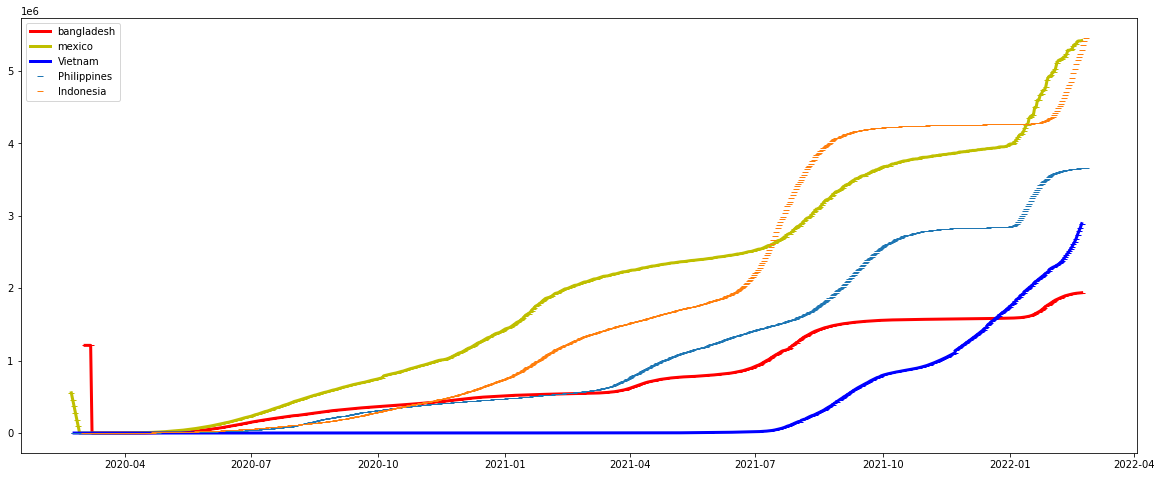

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']=20,8
#*************end****************************
plt.plot(final_dataset_bangladesh.date,final_dataset_bangladesh.total_cases,'r',linewidth=3,label='bangladesh',marker='_',markerfacecolor='green')
plt.plot(final_dataset_mexico.date,final_dataset_mexico.total_cases,'y',linewidth=3,label='mexico',marker='_',markerfacecolor='green')
plt.plot(final_dataset_Vietnam.date,final_dataset_Vietnam.total_cases,'b',linewidth=3,label='Vietnam',marker='_',markerfacecolor='green')
plt.plot(final_dataset_Philippines.date,final_dataset_Philippines.total_cases,'o',linewidth=3,label='Philippines',marker='_',markerfacecolor='green')
plt.plot(final_dataset_Indonesia.date,final_dataset_Indonesia.total_cases,'p',linewidth=3,label='Indonesia',marker='_',markerfacecolor='green')
plt.legend()
#plt.tick_params(axis='x', which='major', labelsize=0)
plt.show()

In [ ]:
download_now=pd.concat([final_dataset_bangladesh,final_dataset_mexico,final_dataset_Vietnam,final_dataset_Philippines,final_dataset_Indonesia])
#download_now

In [ ]:
download_now['new_cases']=download_now['new_cases'].abs()
download_now['new_deaths']=download_now['new_deaths'].abs()

# to replace coloume by value
#download_now.replace({'new_cases': {0.0: 100.0}})

In [ ]:
set(download_now['location'])

{'Bangladesh', 'Indonesia', 'Mexico', 'Philippines', 'Vietnam'}

In [ ]:
download_now.min()

location                 Bangladesh
date            2020-02-22 00:00:00
total_cases                     1.0
new_cases                       0.0
new_deaths                      0.0
total_deaths                    1.0
T2M                             1.9
dtype: object

In [ ]:
download_now.max()

location                    Vietnam
date            2022-02-25 00:00:00
total_cases               5457775.0
new_cases                  109895.0
new_deaths                   3050.0
total_deaths               315786.0
T2M                            32.9
dtype: object

In [ ]:
download_now.isnull().sum()

location        0
date            0
total_cases     0
new_cases       0
new_deaths      0
total_deaths    0
T2M             0
dtype: int64

In [ ]:
Summer= download_now[ (download_now['date']>= "2020-03-22") & (download_now['date']<= "2020-06-30") | (download_now['date']>= "2021-03-01") & (download_now['date']<= "2021-06-30") ] 


#Summer2021= download_now [ (download_now['date']>= "2021-03-01") & (download_now['date']<= "2021-06-30") ]
#Summer['date'] = pd.to_datetime(Summer["date".dt.strftime('%Y-%m-%d')])

In [ ]:
from datetime import date
#print(Summer['date'].dtypes)
Summer['date']=pd.to_datetime(Summer['date'])
Summer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,date,total_cases,new_cases,new_deaths,total_deaths,T2M
19,Bangladesh,2020-03-22,27.0,2.0,0.0,2.0,25.48
20,Bangladesh,2020-03-23,33.0,6.0,1.0,3.0,25.10
21,Bangladesh,2020-03-24,39.0,6.0,1.0,4.0,26.19
22,Bangladesh,2020-03-25,39.0,0.0,1.0,5.0,26.62
23,Bangladesh,2020-03-26,44.0,5.0,0.0,5.0,28.08
...,...,...,...,...,...,...,...
481,Indonesia,2021-06-26,2093962.0,21095.0,358.0,56729.0,22.62
482,Indonesia,2021-06-27,2115304.0,21342.0,409.0,57138.0,22.18
483,Indonesia,2021-06-28,2135998.0,20694.0,423.0,57561.0,22.23
484,Indonesia,2021-06-29,2156465.0,20467.0,463.0,58024.0,21.86


In [ ]:
print(Summer['date'].dtypes)

datetime64[ns]


In [ ]:
#set(Summer2020['date'])

In [ ]:
#set(download_now.loc[Summer2020,'date'])

In [ ]:
spring= download_now[ (download_now['date']>= "2020-07-01") & (download_now['date']<= "2020-10-31") | (download_now['date']>= "2021-07-01") & (download_now['date']<= "2021-10-31") ]

spring['date']=pd.to_datetime(spring['date'])
#spring2020= download_now[ (download_now['date']>= "2020-07-01") & (download_now['date']<= "2020-10-31")  ]

#Spring2021= download_now[ (download_now['date']>= "2021-07-01") & (download_now['date']<= "2021-10-31")]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
winter= download_now [(download_now['date']>= "2020-11-01") & (download_now['date']<= "2021-02-28") | (download_now['date']>= "2021-11-01") & (download_now['date']<= "2022-02-28") ]

#winter2020= download_now [(download_now['date']>= "2020-11-01") & (download_now['date']<= "2021-02-28") ] 
winter['date']=pd.to_datetime(winter['date'])
#winter2021= download_now[ (download_now['date']>= "2021-11-01") & (download_now['date']<= "2022-02-28")]
winter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,location,date,total_cases,new_cases,new_deaths,total_deaths,T2M
243,Bangladesh,2020-11-01,409252.0,1568.0,18.0,5941.0,25.78
244,Bangladesh,2020-11-02,410988.0,1736.0,25.0,5966.0,26.35
245,Bangladesh,2020-11-03,412647.0,1659.0,17.0,5983.0,26.90
246,Bangladesh,2020-11-04,414164.0,1517.0,21.0,6004.0,25.47
247,Bangladesh,2020-11-05,416006.0,1842.0,17.0,6021.0,23.45
...,...,...,...,...,...,...,...
721,Indonesia,2022-02-21,5231923.0,34418.0,176.0,146541.0,20.90
722,Indonesia,2022-02-22,5289414.0,57491.0,257.0,146798.0,21.70
723,Indonesia,2022-02-23,5350902.0,61488.0,227.0,147025.0,22.22
724,Indonesia,2022-02-24,5408328.0,57426.0,317.0,147342.0,22.01


In [ ]:
#download_now[winter2021].max()

In [ ]:
#set(download_now.loc[winter2021,'date'])
set(winter['location'])

{'Bangladesh', 'Indonesia', 'Mexico', 'Philippines', 'Vietnam'}

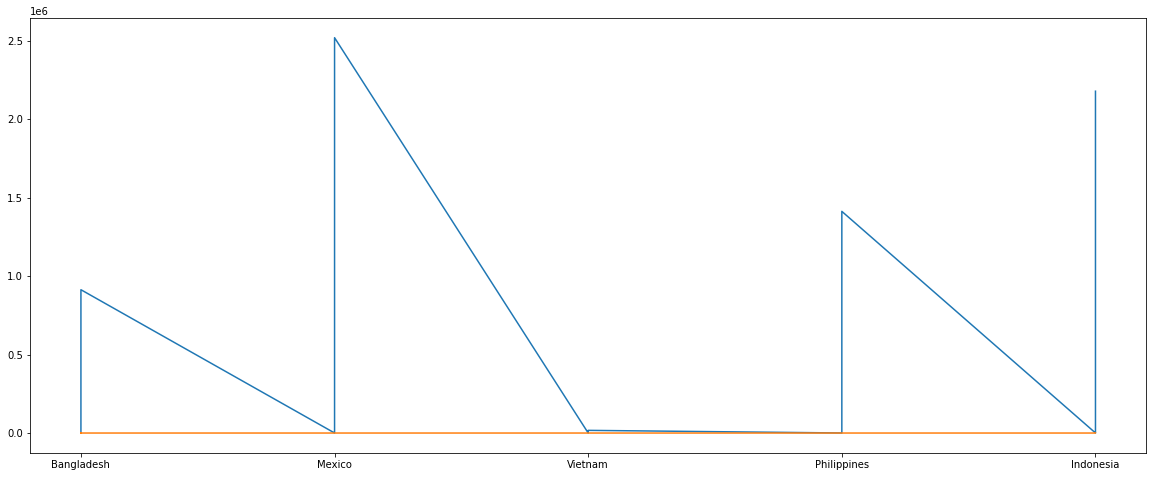

In [ ]:
x=Summer['location']
y=Summer['total_cases']
Z=Summer['T2M']

plt.plot(x,y)
plt.plot(x,Z)
plt.show()

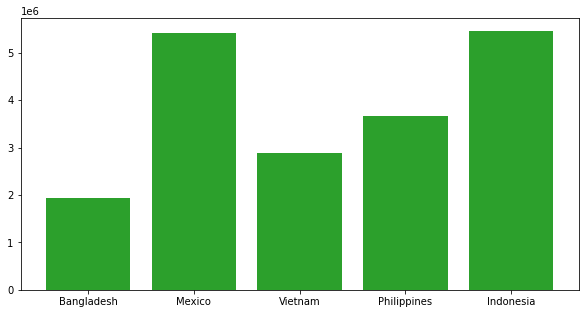

In [ ]:
#************this is used for increseing the grap size
from matplotlib import rcParams
rcParams['figure.figsize']=10,5
#*************end****************************
plt.bar(Summer.location,Summer.total_cases)
plt.bar(spring.location,spring.total_cases)
plt.bar(winter.location,winter.total_cases)

#plt.tick_params(axis='x', which='major', labelsize=0)
plt.show()

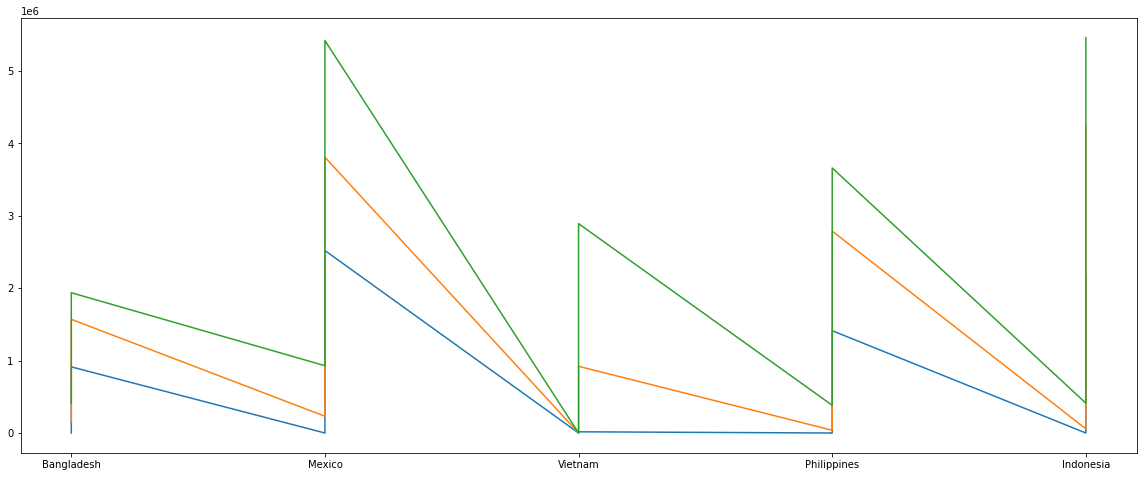

In [ ]:
#************this is used for increseing the grap size
from matplotlib import rcParams
rcParams['figure.figsize']=20,8
#*************end****************************
plt.plot(Summer.location,Summer.total_cases,label='Summer')
plt.plot(spring.location,spring.total_cases,label='spring')
plt.plot(winter.location,winter.total_cases,label='winter')

#plt.tick_params(axis='x', which='major', labelsize=0)
plt.show()

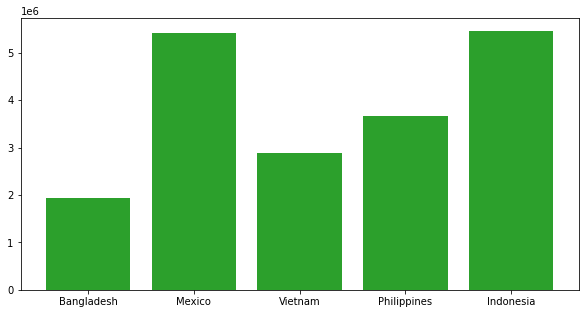

In [ ]:
#************this is used for increseing the grap size
from matplotlib import rcParams
rcParams['figure.figsize']=10,5
#*************end****************************
plt.bar(Summer.location,Summer.total_cases,label=Summer)
plt.bar(spring.location,spring.total_cases,label=spring)
plt.bar(winter.location,winter.total_cases,label=winter)

#plt.tick_params(axis='x', which='major', labelsize=0)
plt.show()

In [ ]:
'''
rcParams['figure.figsize']=15,5
#*************end****************************
plt.plot(Summer.date['2020-03-22','2020-04-10','2020-05-15','2020-06-02'],Summer.total_cases)
plt.plot(spring.date['2020-07-05','2020-08-10','2020-09-15','2020-10-10'],spring.total_cases)
plt.plot(winter.date['2020-11-10','2020-12-10','2021-01-10','2021-02-05'],winter.total_cases)

#plt.tick_params(axis='x', which='major', labelsize=0)
plt.show()
'''

"\nrcParams['figure.figsize']=15,5\n#*************end****************************\nplt.plot(Summer.date['2020-03-22','2020-04-10','2020-05-15','2020-06-02'],Summer.total_cases)\nplt.plot(spring.date['2020-07-05','2020-08-10','2020-09-15','2020-10-10'],spring.total_cases)\nplt.plot(winter.date['2020-11-10','2020-12-10','2021-01-10','2021-02-05'],winter.total_cases)\n\n#plt.tick_params(axis='x', which='major', labelsize=0)\nplt.show()\n"

In [ ]:
'''
%matplotlib inline  
Summer.total_cases.resample('M').mean().plot()
'''

"\n%matplotlib inline  \nSummer.total_cases.resample('M').mean().plot()\n"

In [ ]:
'''
rcParams['figure.figsize']=15,5
#*************end****************************
plt.plot(Summer.random.choice('date'),Summer.total_cases)

#plt.tick_params(axis='x', which='major', labelsize=0)
plt.show()
'''

"\nrcParams['figure.figsize']=15,5\n#*************end****************************\nplt.plot(Summer.random.choice('date'),Summer.total_cases)\n\n#plt.tick_params(axis='x', which='major', labelsize=0)\nplt.show()\n"

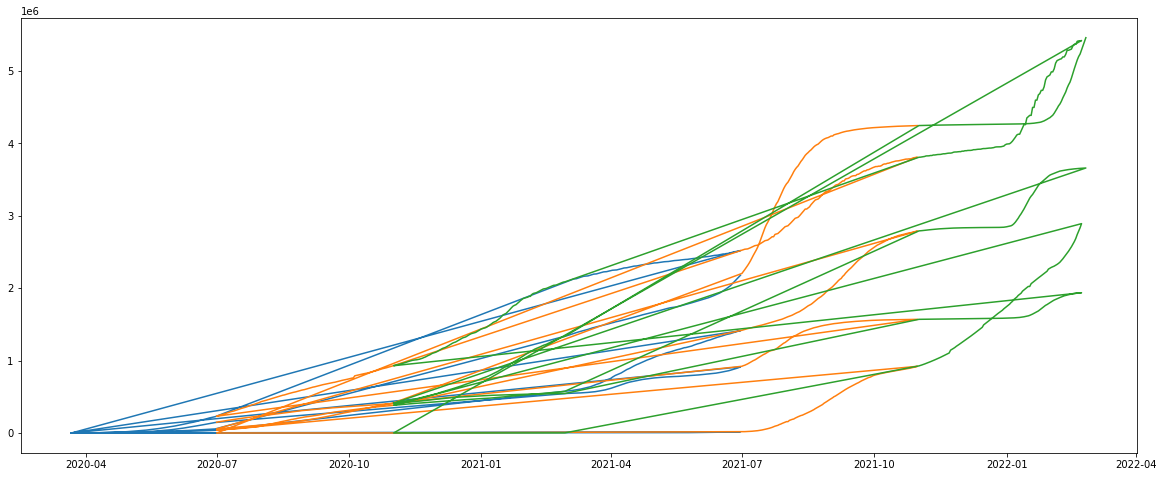

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']=20,8
#*************end****************************
plt.plot(Summer.date,Summer.total_cases,label='Summer')
plt.plot(spring.date,spring.total_cases,label='spring')
plt.plot(winter.date,winter.total_cases,label='winter')

#plt.tick_params(axis='x', which='major', labelsize=0)
plt.show()

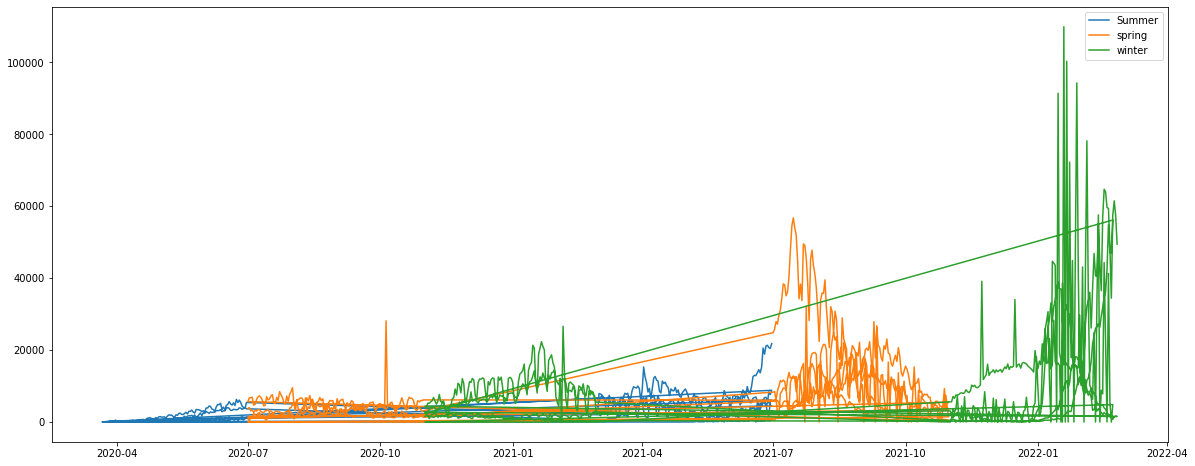

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']=20,8
#*************end****************************
many_line=plt.subplot(111)
many_line.plot(Summer.date,Summer.new_cases,label='Summer')
many_line.plot(spring.date,spring.new_cases,label='spring')
many_line.plot(winter.date,winter.new_cases,label='winter')
plt.legend()
#plt.tick_params(axis='x', which='major', labelsize=0)
plt.show()

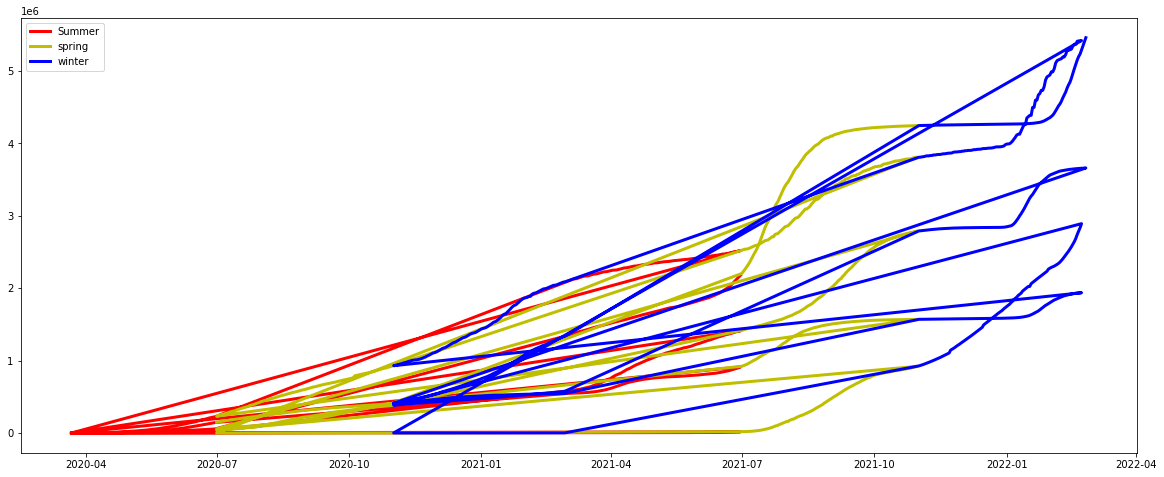

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']=20,8
#*************end****************************
plt.plot(Summer.date,Summer.total_cases,'r',linewidth=3,label='Summer')
plt.plot(spring.date,spring.total_cases,'y',linewidth=3,label='spring')
plt.plot(winter.date,winter.total_cases,'b',linewidth=3,label='winter')
plt.legend()
#plt.tick_params(axis='x', which='major', labelsize=0)
plt.show()

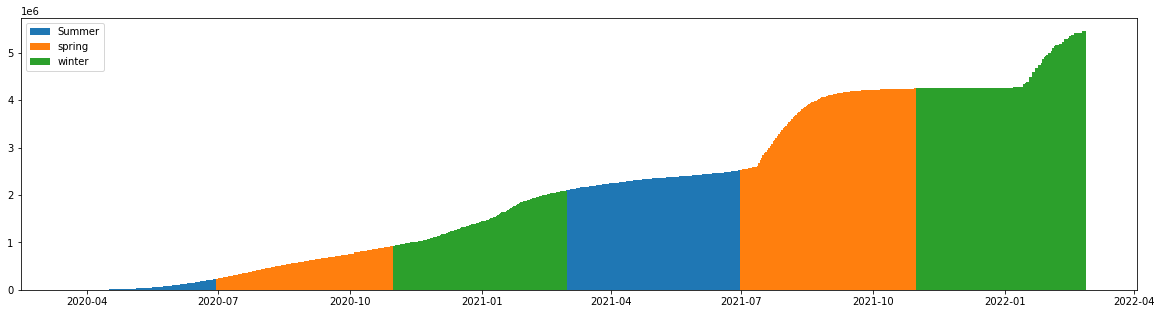

In [ ]:
#************this is used for increseing the grap size
from matplotlib import rcParams
rcParams['figure.figsize']=20,5
#*************end****************************
plt.bar(Summer.date,Summer.total_cases,label='Summer',width=2.5)
plt.bar(spring.date,spring.total_cases,label='spring',width=2.5)
plt.bar(winter.date,winter.total_cases,label='winter',width=2.5)
plt.legend()
#plt.tick_params(axis='x', which='major', labelsize=0)
plt.show()

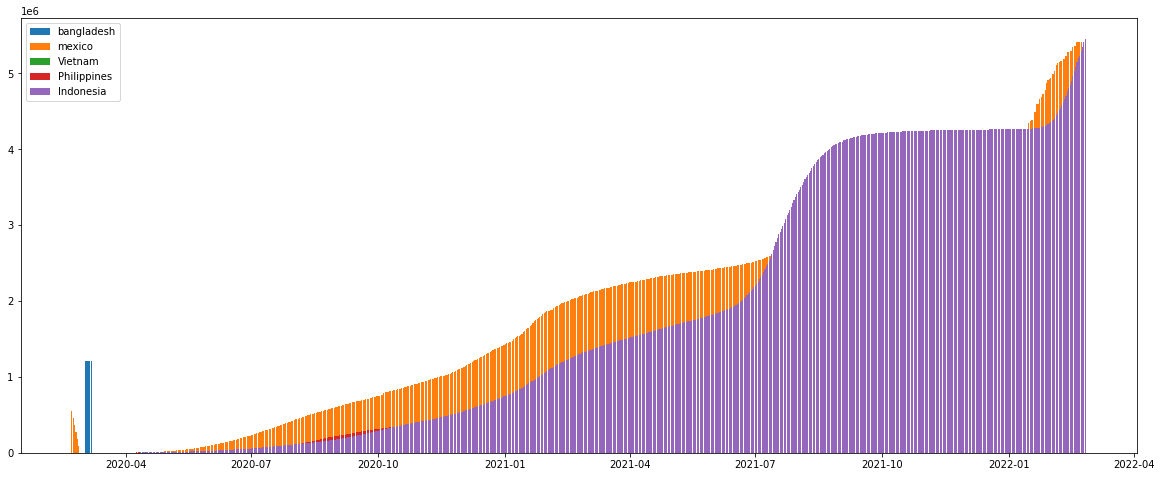

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']=20,8
#*************end****************************

plt.bar(final_dataset_bangladesh.date,final_dataset_bangladesh.total_cases,label='bangladesh')
plt.bar(final_dataset_mexico.date,final_dataset_mexico.total_cases,label='mexico')
plt.bar(final_dataset_Vietnam.date,final_dataset_Vietnam.total_cases,label='Vietnam')
plt.bar(final_dataset_Philippines.date,final_dataset_Philippines.total_cases,label='Philippines')
plt.bar(final_dataset_Indonesia.date,final_dataset_Indonesia.total_cases,label='Indonesia')
plt.legend()

#plt.tick_params(axis='x', which='major', labelsize=0)
plt.show() 

In [ ]:
#plt.pie(download_now['total_cases'],labels=download_now['location'])

In [ ]:
bangladesh_summer_data=Summer[(Summer['location'] == "Bangladesh")]
bangladesh_spring_data=spring[(spring['location'] == "Bangladesh")]
bangladesh_winter_data=winter[(winter['location'] == "Bangladesh")]

bangladesh_summer_data['season']='summer'
bangladesh_spring_data['season']='spring'
bangladesh_winter_data['season']='winter'

bd_seasons=pd.concat([bangladesh_summer_data,bangladesh_spring_data,bangladesh_winter_data])
#bangladesh_spring_data=spring['location'] == "Bangladesh"
#bangladesh_winter_data=winter['location']== "Bangladesh"

#Summer.loc[bangladesh_summer_data]
#set(Summer.loc[bangladesh_summer_data])
#bangladesh_summer_data
bd_seasons.max()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

location                 Bangladesh
date            2022-02-22 00:00:00
total_cases               1936837.0
new_cases                   16230.0
new_deaths                    264.0
total_deaths                28990.0
T2M                            32.9
season                       winter
dtype: object

In [ ]:
mexico_summer_data=Summer[(Summer['location'] == "Mexico")]
mexico_spring_data=spring[(spring['location'] == "Mexico")]
mexico_winter_data=winter[(winter['location'] == "Mexico")]

mexico_summer_data['season']='summer'
mexico_spring_data['season']='spring'
mexico_winter_data['season']='winter'

mx_seasons=pd.concat([mexico_summer_data,mexico_spring_data,mexico_winter_data])

mexico_summer_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,location,date,total_cases,new_cases,new_deaths,total_deaths,T2M,season
29,Mexico,2020-03-22,316.0,65.0,1.0,3.0,19.36,summer
30,Mexico,2020-03-23,367.0,51.0,1.0,4.0,18.57,summer
31,Mexico,2020-03-24,405.0,38.0,1.0,5.0,18.62,summer
32,Mexico,2020-03-25,475.0,70.0,1.0,6.0,18.82,summer
33,Mexico,2020-03-26,585.0,110.0,2.0,8.0,19.30,summer
...,...,...,...,...,...,...,...,...
490,Mexico,2021-06-26,2503408.0,5051.0,175.0,232521.0,22.73,summer
491,Mexico,2021-06-27,2505792.0,2384.0,43.0,232564.0,23.17,summer
492,Mexico,2021-06-28,2507453.0,1661.0,44.0,232608.0,22.33,summer
493,Mexico,2021-06-29,2513164.0,5711.0,195.0,232803.0,21.20,summer


In [ ]:
Indonesia_summer_data=Summer[(Summer['location'] == "Indonesia")]
Indonesia_spring_data=spring[(spring['location'] == "Indonesia")]
Indonesia_winter_data=winter[(winter['location'] == "Indonesia")]

Indonesia_summer_data['season']='summer'
Indonesia_spring_data['season']='spring'
Indonesia_winter_data['season']='winter'

indo_seasons=pd.concat([Indonesia_summer_data,Indonesia_spring_data,Indonesia_winter_data])

Indonesia_summer_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,location,date,total_cases,new_cases,new_deaths,total_deaths,T2M,season
20,Indonesia,2020-03-22,514.0,64.0,10.0,48.0,22.74,summer
21,Indonesia,2020-03-23,579.0,65.0,1.0,49.0,22.95,summer
22,Indonesia,2020-03-24,686.0,107.0,6.0,55.0,23.03,summer
23,Indonesia,2020-03-25,790.0,104.0,3.0,58.0,23.57,summer
24,Indonesia,2020-03-26,893.0,103.0,20.0,78.0,23.18,summer
...,...,...,...,...,...,...,...,...
481,Indonesia,2021-06-26,2093962.0,21095.0,358.0,56729.0,22.62,summer
482,Indonesia,2021-06-27,2115304.0,21342.0,409.0,57138.0,22.18,summer
483,Indonesia,2021-06-28,2135998.0,20694.0,423.0,57561.0,22.23,summer
484,Indonesia,2021-06-29,2156465.0,20467.0,463.0,58024.0,21.86,summer


In [ ]:
Philippines_summer_data=Summer[(Summer['location'] == "Philippines")]
Philippines_spring_data=spring[(spring['location'] == "Philippines")]
Philippines_winter_data=winter[(winter['location'] == "Philippines")]

Philippines_summer_data['season']='summer'
Philippines_spring_data['season']='spring'
Philippines_winter_data['season']='winter'

ph_seasons=pd.concat([Philippines_summer_data,Philippines_spring_data,Philippines_winter_data])

Philippines_summer_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,location,date,total_cases,new_cases,new_deaths,total_deaths,T2M,season
27,Philippines,2020-03-22,380.0,73.0,6.0,25.0,27.83,summer
28,Philippines,2020-03-23,462.0,82.0,8.0,33.0,27.76,summer
29,Philippines,2020-03-24,552.0,90.0,2.0,35.0,27.52,summer
30,Philippines,2020-03-25,636.0,84.0,3.0,38.0,27.56,summer
31,Philippines,2020-03-26,707.0,71.0,7.0,45.0,27.85,summer
...,...,...,...,...,...,...,...,...
488,Philippines,2021-06-26,1391911.0,6858.0,92.0,24244.0,29.39,summer
489,Philippines,2021-06-27,1397992.0,6081.0,128.0,24372.0,28.92,summer
490,Philippines,2021-06-28,1403588.0,5596.0,84.0,24456.0,29.01,summer
491,Philippines,2021-06-29,1408058.0,4470.0,101.0,24557.0,29.33,summer


In [ ]:
Vietnam_summer_data=Summer[(Summer['location'] == "Vietnam")]
Vietnam_spring_data=spring[(spring['location'] == "Vietnam")]
Vietnam_winter_data=winter[(winter['location'] == "Vietnam")]

Vietnam_summer_data['season']='summer'
Vietnam_spring_data['season']='spring'
Vietnam_winter_data['season']='winter'

vt_seasons=pd.concat([Vietnam_summer_data,Vietnam_spring_data,Vietnam_winter_data])

Vietnam_summer_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,location,date,total_cases,new_cases,new_deaths,total_deaths,T2M,season
27,Vietnam,2020-03-22,113.0,19.0,41.408377,38562.952880,24.93,summer
28,Vietnam,2020-03-23,123.0,10.0,41.115183,38268.602094,24.77,summer
29,Vietnam,2020-03-24,134.0,11.0,40.821990,37974.251309,24.50,summer
30,Vietnam,2020-03-25,141.0,7.0,40.528796,37679.900524,24.90,summer
31,Vietnam,2020-03-26,153.0,12.0,40.235602,37385.549738,25.57,summer
...,...,...,...,...,...,...,...,...
488,Vietnam,2021-06-26,15325.0,788.0,0.000000,74.000000,24.44,summer
489,Vietnam,2021-06-27,15740.0,415.0,2.000000,76.000000,25.11,summer
490,Vietnam,2021-06-28,16136.0,396.0,2.000000,78.000000,25.24,summer
491,Vietnam,2021-06-29,16507.0,371.0,2.000000,80.000000,25.26,summer


In [ ]:

bd_summer_mean = bangladesh_summer_data['new_cases'].mean()
bd_spring_mean = bangladesh_spring_data['new_cases'].mean()
bd_winter_mean = bangladesh_winter_data['new_cases'].mean()

#bd_summer_mean
#bd_spring_mean
#bd_winter_mean

#bangladesh_summer_data.mean()

In [ ]:
#plt.pie(bd_seasons['total_cases'].mean(),labels=bd_seasons['season'],autopct='%1.2f%%')

In [ ]:
your_lables=bd_seasons.season
your_values=bd_seasons['total_cases']

In [ ]:
#plt.pie(bd_seasons['total_cases','season'])
#plt.show()

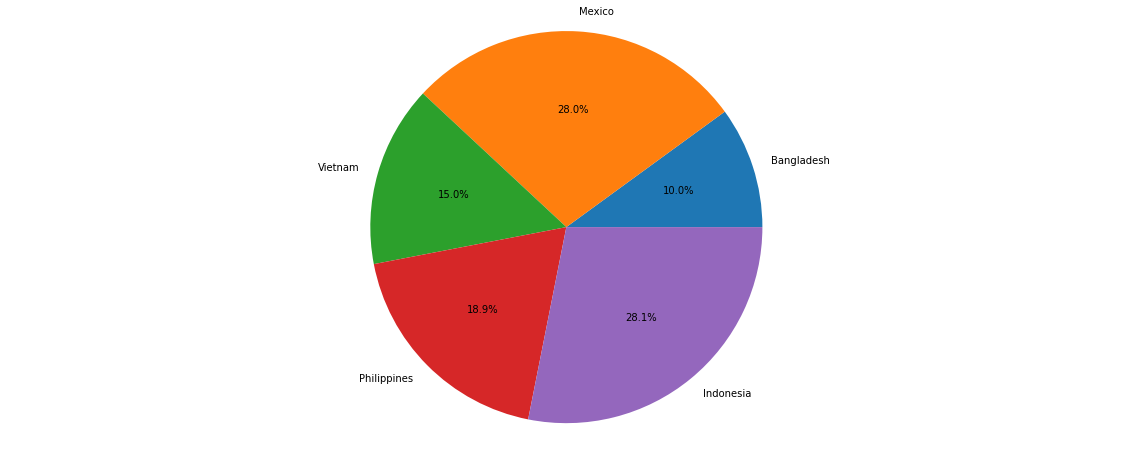

In [ ]:
season='Bangladesh','Mexico','Vietnam','Philippines','Indonesia'

#we can use newcases or newcases2

newcases=[2298.20,3733.66,2161.66]

newcases2=[ bd_seasons['new_cases'].mean(),mx_seasons['new_cases'].mean(),vt_seasons['new_cases'].mean(),ph_seasons['new_cases'].mean(),indo_seasons['new_cases'].mean()]

fig1, ax1=plt.subplots()

ax1.pie(newcases2,labels=season,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

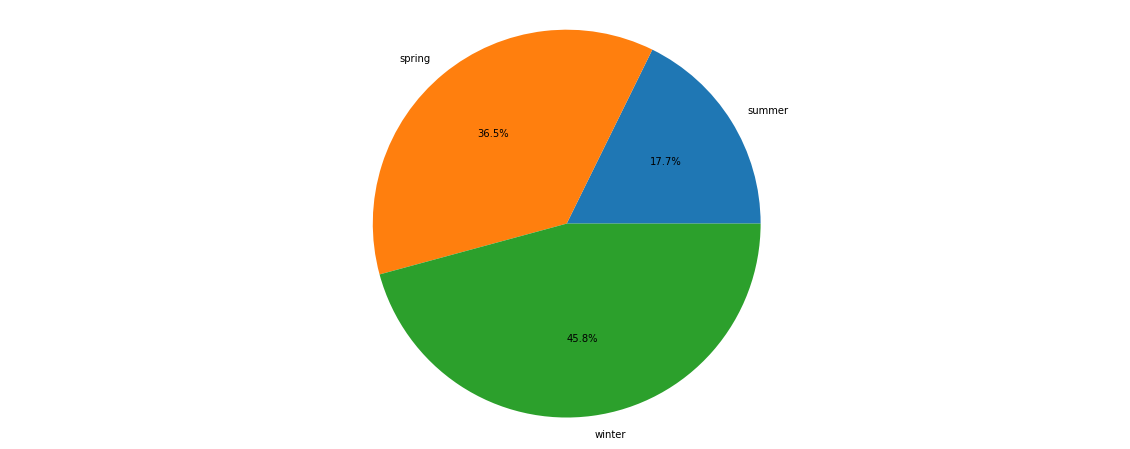

In [ ]:
season='summer','spring','winter'

#we can use newcases or newcases2

newcases=[2298.20,3733.66,2161.66]

newcases2=[ bangladesh_summer_data['total_cases'].mean(),bangladesh_spring_data['total_cases'].mean(),bangladesh_winter_data['total_cases'].mean()]



fig1, ax1=plt.subplots()

ax1.pie(newcases2,labels=season,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

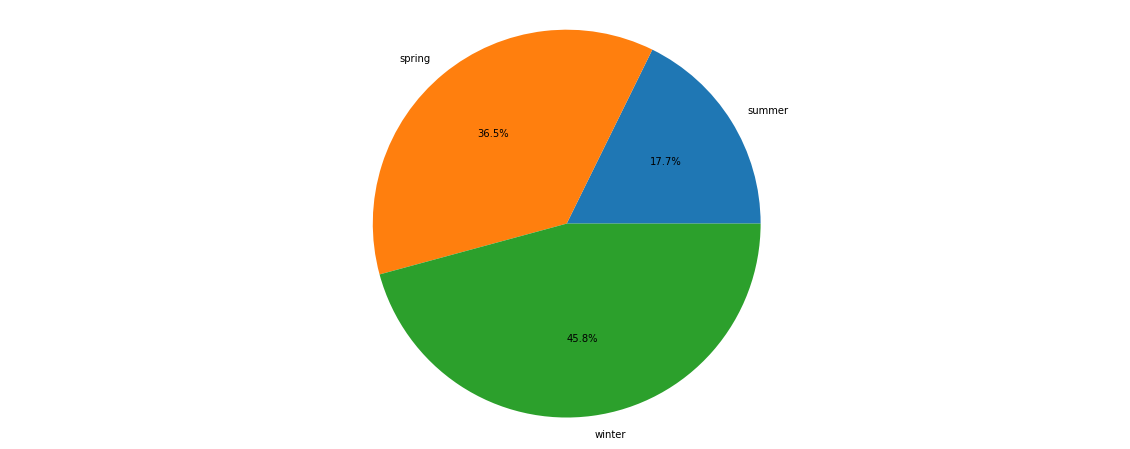

In [ ]:
season='summer','spring','winter'

#we can use newcases or newcases2

newcases=[2298.20,3733.66,2161.66]

newcases2=[ bangladesh_summer_data['total_cases'].mean(),bangladesh_spring_data['total_cases'].mean(),bangladesh_winter_data['total_cases'].mean()]

fig1, ax1=plt.subplots()

ax1.pie(newcases2,labels=season,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()


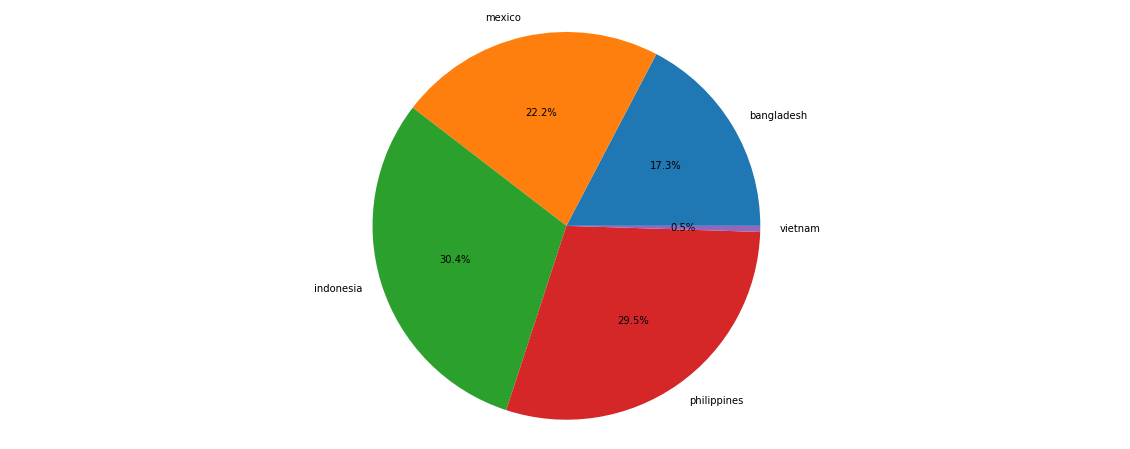

In [ ]:
#season=[bangladesh_summer_data['location'],mexico_summer_data['location'],Indonesia_summer_data['location'],Philippines_summer_data['location'],Vietnam_summer_data['location']]
season2='bangladesh','mexico','indonesia','philippines','vietnam'
#we can use newcases or newcases2

newcases=[2298.20,3733.66,2161.66]

newcases2=[ bangladesh_summer_data['new_cases'].mean(),mexico_summer_data['new_cases'].mean(),Indonesia_summer_data['new_cases'].mean(),Philippines_summer_data['new_cases'].mean(),Vietnam_summer_data['new_cases'].mean()]

fig1, ax1=plt.subplots()

ax1.pie(newcases2,labels=season2,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()


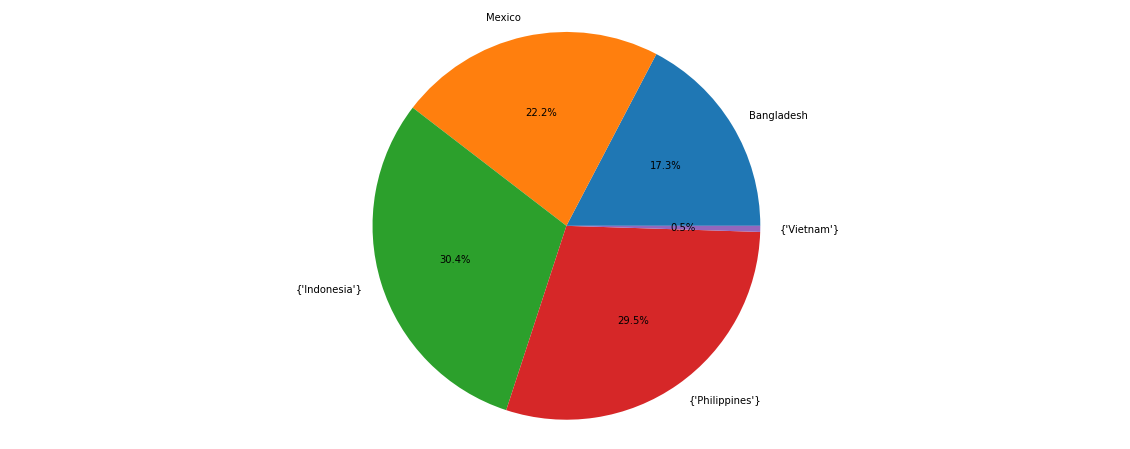

In [ ]:
#There are two way to select country name, using values function and other is set funcetion .. in this location coloum there is same name so select the unique value i can use set and values function  
season=bangladesh_summer_data['location'].values[0],mexico_summer_data['location'].values[0],set(Indonesia_summer_data['location']),set(Philippines_summer_data['location']),set(Vietnam_summer_data['location'])
#season2='bangladesh','mexico','indonesia','philippines','vietnam'
#we can use newcases or newcases

newcases=[2298.20,3733.66,2161.66]

newcases2=[ bangladesh_summer_data['new_cases'].mean(),mexico_summer_data['new_cases'].mean(),Indonesia_summer_data['new_cases'].mean(),Philippines_summer_data['new_cases'].mean(),Vietnam_summer_data['new_cases'].mean()]

fig1, ax1=plt.subplots()

ax1.pie(newcases2,labels=season,autopct='%1.1f%%')

ax1.axis('equal')
plt.show()


In [ ]:
#season=[bangladesh_summer_data['location'],mexico_summer_data['location'],Indonesia_summer_data['location'],Philippines_summer_data['location'],Vietnam_summer_data['location']]
#season

In [ ]:
#season=[bangladesh_summer_data['location'].any(),mexico_summer_data['location'].any()]
#season

In [ ]:
#pridiction par will take place now


In [ ]:
new_bd_seasons=bd_seasons[['date', 'new_cases','T2M']]

#new_bd_seasons = new_bd_seasons['date'].values.astype('datetime64[D]')
#new_bd_seasons.date= pd.to_datetime(new_bd_seasons.date, format='%m/%d/%y')


print(new_bd_seasons.dtypes)

date         datetime64[ns]
new_cases           float64
T2M                 float64
dtype: object


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_training=new_bd_seasons[new_bd_seasons['date']<='2022-01-22'].copy()



In [ ]:
data_testing=new_bd_seasons[new_bd_seasons['date']>='2022-01-22'].copy()

In [ ]:
training_data=data_training.drop(['date'],axis=1)

In [ ]:
scaler=MinMaxScaler()
training_data=scaler.fit_transform(training_data)

In [ ]:
X_train=[]
y_train=[]


In [ ]:
for i in range(30, training_data.shape[0]):
    X_train.append(training_data[i-30:i])
    y_train.append(training_data[i,0])
    

In [ ]:
X_train,y_train=np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(642, 30, 2)

In [ ]:
#build LSTM

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressior= Sequential()
regressior.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],2)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units=60, activation='relu', return_sequences=True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units=80, activation='relu', return_sequences=True))
regressior.add(Dropout(0.2))

#regressior.add(LSTM(units=100, activation='relu', return_sequences=True))
#regressior.add(Dropout(0.2))

regressior.add(LSTM(units=120, activation='relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units=1))


In [ ]:
regressior.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 30, 50)            10600     
                                                                 
 dropout_40 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 30, 60)            26640     
                                                                 
 dropout_41 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_22 (LSTM)              (None, 30, 80)            45120     
                                                                 
 dropout_42 (Dropout)        (None, 30, 80)            0         
                                                                 
 lstm_23 (LSTM)              (None, 120)             

In [ ]:
regressior.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
regressior.fit(X_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 7s 91ms/step - loss: 0.0351
Epoch 2/100
21/21 [==============================] - 2s 96ms/step - loss: 0.0220
Epoch 3/100
21/21 [==============================] - 2s 93ms/step - loss: 0.0185
Epoch 4/100
21/21 [==============================] - 2s 94ms/step - loss: 0.0194
Epoch 5/100
21/21 [==============================] - 2s 95ms/step - loss: 0.0177
Epoch 6/100
21/21 [==============================] - 2s 94ms/step - loss: 0.0153
Epoch 7/100
21/21 [==============================] - 2s 93ms/step - loss: 0.0138
Epoch 8/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0131
Epoch 9/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0118
Epoch 10/100
21/21 [==============================] - 2s 91ms/step - loss: 0.0100
Epoch 11/100
21/21 [==============================] - 2s 90ms/step - loss: 0.0094
Epoch 12/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0086
Epoch 13/100
21/21 [=====

In [ ]:
#prepare test data set


In [ ]:
past_30_days= data_training.tail(30)

In [ ]:
df = past_30_days.append(data_testing, ignore_index=True)
df

,date,new_cases,T2M
0,2021-12-24,342.0,17.91
1,2021-12-25,275.0,18.41
2,2021-12-26,268.0,18.01
3,2021-12-27,373.0,17.85
4,2021-12-28,397.0,17.88
...,...,...,...
57,2022-02-18,2584.0,18.79
58,2022-02-19,2150.0,19.39
59,2022-02-20,1987.0,19.99
60,2022-02-21,1951.0,20.16


In [ ]:
df= df.drop(['date'],axis=1)

In [ ]:
inputs= scaler.transform(df)

In [ ]:
X_test =[]
y_test =[]

for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i])
    y_test.append(inputs[i,0])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((32, 30, 2), (32,))

In [ ]:
y_pred= regressior.predict(X_test)

In [ ]:
y_pred, y_test

(array([[0.65425074],
        [0.65647167],
        [0.66043264],
        [0.6692174 ],
        [0.68442804],
        [0.69914764],
        [0.7113059 ],
        [0.71795815],
        [0.7129977 ],
        [0.6984533 ],
        [0.678067  ],
        [0.65574425],
        [0.632205  ],
        [0.6082317 ],
        [0.58036995],
        [0.55046445],
        [0.5202796 ],
        [0.4969655 ],
        [0.48091933],
        [0.46817148],
        [0.44971243],
        [0.4219019 ],
        [0.39081278],
        [0.35953763],
        [0.33109084],
        [0.30756143],
        [0.28772417],
        [0.2700786 ],
        [0.2520684 ],
        [0.23370756],
        [0.21465853],
        [0.1965439 ]], dtype=float32),
 array([0.59235983, 0.6719655 , 0.91361676, 0.98786198, 0.95668515,
        0.97393715, 0.95132471, 0.63943315, 0.75064695, 0.83185459,
        0.81047443, 0.75126309, 0.71447936, 0.55773259, 0.51503389,
        0.51417129, 0.57726433, 0.51472582, 0.49390018, 0.44756624,
       

In [ ]:
scaler.scale_

array([6.16142945e-05, 5.33333333e-02])

In [ ]:
scale=1/6.16142945e-05
scale

16230.00000430095

In [ ]:
y_pred= y_pred*scale
y_test= y_test*scale

In [ ]:
#visualization6.16142945e-05

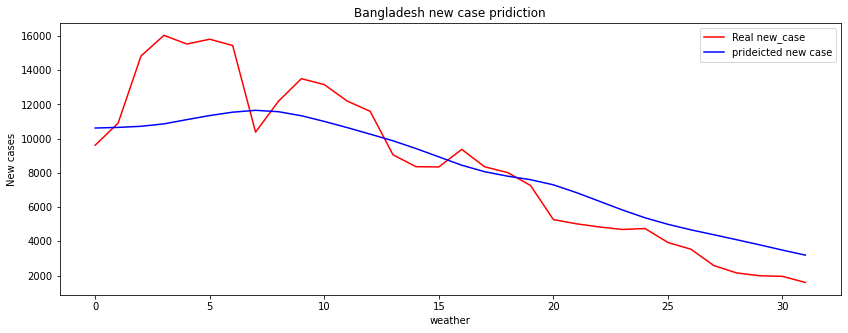

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real new_case')
plt.plot(y_pred, color='blue', label = 'prideicted new case')
plt.title('Bangladesh new case pridiction')
plt.xlabel('weather')
plt.ylabel('New cases')
plt.legend()
plt.show()

In [ ]:
#Now we are going to use GRU


In [ ]:
import numpy as np
import pandas as ps
import pandas_datareader.data as weather

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
gru_new_bd_seasons=bd_seasons[['date', 'new_cases','T2M']]


In [ ]:
gru_data_training=gru_new_bd_seasons[gru_new_bd_seasons['date']<='2022-01-22'].copy()

In [ ]:
gru_data_testing=gru_new_bd_seasons[gru_new_bd_seasons['date']>='2022-01-22'].copy()


In [ ]:
gru_training_data=gru_data_training.drop(['date'],axis=1)

In [ ]:
gru_scaler=MinMaxScaler()
gru_training_data=gru_scaler.fit_transform(gru_training_data)

In [ ]:
gru_X_train=[]
gru_y_train=[]


In [ ]:
for i in range(30, gru_training_data.shape[0]):
    gru_X_train.append(gru_training_data[i-30:i])
    gru_y_train.append(gru_training_data[i,0])
    

In [ ]:
gru_X_train,gru_y_train=np.array(gru_X_train), np.array(gru_y_train)

In [ ]:
gru_regressior= Sequential()
gru_regressior.add(layers.GRU(units=50, activation='relu', recurrent_activation='sigmoid',  return_sequences=True, input_shape=(gru_X_train.shape[1],2)))
gru_regressior.add(layers.Dropout(0.2))

gru_regressior.add(layers.GRU(units=60, activation='relu', return_sequences=True))
gru_regressior.add(layers.Dropout(0.2))

gru_regressior.add(layers.GRU(units=80, activation='relu', return_sequences=True))
gru_regressior.add(layers.Dropout(0.2))

#gru_regressior.add(layers.GRU(units=100, activation='relu', return_sequences=True))
#gru_regressior.add(layers.Dropout(0.2))

gru_regressior.add(layers.GRU(units=120, activation='relu'))
gru_regressior.add(layers.Dropout(0.2))

gru_regressior.add(layers.Dense(units=1))


In [ ]:
gru_regressior.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
gru_regressior.fit(gru_X_train,gru_y_train,epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 8s 83ms/step - loss: 0.0317
Epoch 2/100
21/21 [==============================] - 2s 81ms/step - loss: 0.0120
Epoch 3/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0106
Epoch 4/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0088
Epoch 5/100
21/21 [==============================] - 2s 84ms/step - loss: 0.0080
Epoch 6/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0080
Epoch 7/100
21/21 [==============================] - 2s 84ms/step - loss: 0.0064
Epoch 8/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0088
Epoch 9/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0069
Epoch 10/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0060
Epoch 11/100
21/21 [==============================] - 2s 84ms/step - loss: 0.0055
Epoch 12/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0058
Epoch 13/100
21/21 [=====

In [ ]:
#prepare test data set


In [ ]:
gru_past_30_days= gru_data_training.tail(30)

In [ ]:
gru_df = gru_past_30_days.append(gru_data_testing, ignore_index=True)


In [ ]:
gru_df= gru_df.drop(['date'],axis=1)

In [ ]:
gru_inputs= gru_scaler.transform(gru_df)

In [ ]:
gru_X_test =[]
gru_y_test =[]

for i in range(30,gru_inputs.shape[0]):
    gru_X_test.append(gru_inputs[i-30:i])
    gru_y_test.append(gru_inputs[i,0])

In [ ]:
gru_X_test, gru_y_test = np.array(gru_X_test), np.array(gru_y_test)
gru_X_test.shape, gru_y_test.shape

((32, 30, 2), (32,))

In [ ]:
gru_y_pred= gru_regressior.predict(gru_X_test)

In [ ]:
gru_scaler.scale_

array([6.16142945e-05, 5.33333333e-02])

In [ ]:
gru_scale=1/6.16142945e-05
gru_scale

16230.00000430095

In [ ]:
gru_y_pred= gru_y_pred*gru_scale
gru_y_test= gru_y_test*gru_scale

In [ ]:
#visualization6.16142945e-05

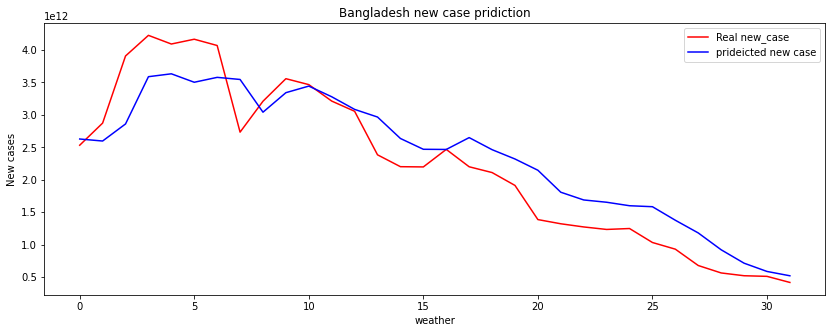

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(gru_y_test, color = 'red', label = 'Real new_case')
plt.plot(gru_y_pred, color='blue', label = 'prideicted new case')
plt.title('Bangladesh new case pridiction')
plt.xlabel('weather')
plt.ylabel('New cases')
plt.legend()
plt.show()

In [ ]:
#maxico data model LSTM

In [ ]:
new_mx_seasons=mx_seasons[['date', 'new_cases','T2M']]

In [ ]:
mx_data_training=new_mx_seasons[new_mx_seasons['date']<='2022-01-22'].copy()



In [ ]:
#mx_data_training=new_mx_seasons[new_mx_seasons['date']<='2022-01-22'].copy()



In [ ]:
mx_data_testing=new_mx_seasons[new_mx_seasons['date']>='2022-01-22'].copy()

In [ ]:
mx_training_data=mx_data_training.drop(['date'],axis=1)

In [ ]:
mx_scaler=MinMaxScaler()
mx_training_data=mx_scaler.fit_transform(mx_training_data)

In [ ]:
mx_X_train=[]
mx_y_train=[]


In [ ]:
for i in range(30, mx_training_data.shape[0]):
    mx_X_train.append(mx_training_data[i-30:i])
    mx_y_train.append(mx_training_data[i,0])
    

In [ ]:
mx_X_train,mx_y_train=np.array(mx_X_train), np.array(mx_y_train)

In [ ]:
mx_regressior= Sequential()
mx_regressior.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(mx_X_train.shape[1],2)))
mx_regressior.add(Dropout(0.2))

mx_regressior.add(LSTM(units=60, activation='relu', return_sequences=True))
mx_regressior.add(Dropout(0.2))

mx_regressior.add(LSTM(units=80, activation='relu', return_sequences=True))
mx_regressior.add(Dropout(0.2))

#regressior.add(LSTM(units=100, activation='relu', return_sequences=True))
#regressior.add(Dropout(0.2))

mx_regressior.add(LSTM(units=120, activation='relu'))
mx_regressior.add(Dropout(0.2))

mx_regressior.add(Dense(units=1))


In [ ]:
mx_regressior.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
mx_regressior.fit(mx_X_train,mx_y_train,epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 7s 90ms/step - loss: 0.0070
Epoch 2/100
21/21 [==============================] - 2s 93ms/step - loss: 0.0063
Epoch 3/100
21/21 [==============================] - 2s 91ms/step - loss: 0.0060
Epoch 4/100
21/21 [==============================] - 2s 93ms/step - loss: 0.0059
Epoch 5/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0061
Epoch 6/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0055
Epoch 7/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0054
Epoch 8/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0060
Epoch 9/100
21/21 [==============================] - 2s 91ms/step - loss: 0.0057
Epoch 10/100
21/21 [==============================] - 2s 90ms/step - loss: 0.0053
Epoch 11/100
21/21 [==============================] - 2s 93ms/step - loss: 0.0050
Epoch 12/100
21/21 [==============================] - 2s 91ms/step - loss: 0.0071
Epoch 13/100
21/21 [=====

In [ ]:
mx_past_30_days= mx_data_training.tail(30)

In [ ]:
mx_df = mx_past_30_days.append(mx_data_testing, ignore_index=True)
mx_df

,date,new_cases,T2M
0,2021-12-24,6883.0,11.61
1,2021-12-25,2916.0,11.55
2,2021-12-26,0.0,11.15
3,2021-12-27,803.0,9.73
4,2021-12-28,943.0,11.51
...,...,...,...
57,2022-02-18,0.0,15.97
58,2022-02-19,41306.0,15.30
59,2022-02-20,5714.0,4.58
60,2022-02-21,0.0,5.90


In [ ]:
mx_df= mx_df.drop(['date'],axis=1)

In [ ]:
mx_inputs= mx_scaler.transform(mx_df)

In [ ]:
mx_X_test =[]
mx_y_test =[]

for i in range(30,mx_inputs.shape[0]):
    mx_X_test.append(mx_inputs[i-30:i])
    mx_y_test.append(mx_inputs[i,0])

In [ ]:
mx_X_test, mx_y_test = np.array(mx_X_test), np.array(mx_y_test)
mx_X_test.shape, mx_y_test.shape

((32, 30, 2), (32,))

In [ ]:
mx_y_pred= mx_regressior.predict(mx_X_test)

In [ ]:
mx_y_pred, mx_y_test

(array([[0.3207902 ],
        [0.31042305],
        [0.29786217],
        [0.28188118],
        [0.2627148 ],
        [0.23909202],
        [0.21123083],
        [0.18572156],
        [0.16194138],
        [0.14612874],
        [0.13445857],
        [0.12488827],
        [0.11308089],
        [0.10141832],
        [0.09328619],
        [0.08936514],
        [0.08917714],
        [0.08996756],
        [0.0904002 ],
        [0.08556744],
        [0.08093067],
        [0.07600926],
        [0.07137496],
        [0.06889493],
        [0.06503272],
        [0.06124537],
        [0.05833922],
        [0.05620641],
        [0.05346646],
        [0.05286813],
        [0.05218114],
        [0.05426854]], dtype=float32),
 array([0.        , 0.65735475, 0.16322854, 0.40859002, 0.        ,
        0.44248601, 0.85777333, 0.38747896, 0.12672096, 0.11393603,
        0.39218345, 0.        , 0.38383002, 0.71138814, 0.32069703,
        0.09312526, 0.08409846, 0.05771873, 0.22656172, 0.        ,
       

In [ ]:
mx_scaler.scale_

array([9.09959507e-06, 4.01284109e-02])

In [ ]:
mx_scale=1/6.16142945e-05
mx_scale

16230.00000430095

In [ ]:
mx_y_pred= mx_y_pred*mx_scale
mx_y_test= mx_y_test*mx_scale

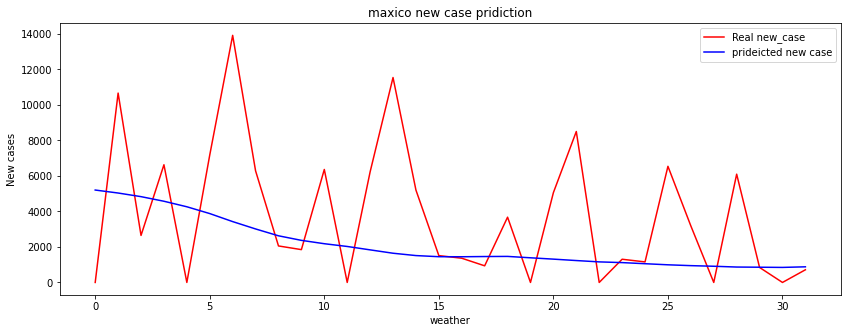

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(mx_y_test, color = 'red', label = 'Real new_case')
plt.plot(mx_y_pred, color='blue', label = 'prideicted new case')
plt.title('maxico new case pridiction')
plt.xlabel('weather')
plt.ylabel('New cases')
plt.legend()
plt.show()


In [ ]:
#maxico GRU mode

In [ ]:
mx_gru_new_bd_seasons=mx_seasons[['date', 'new_cases','T2M']]

In [ ]:
mx_gru_data_training=mx_gru_new_bd_seasons[mx_gru_new_bd_seasons['date']<='2022-01-22'].copy()

In [ ]:
mx_gru_data_testing=mx_gru_new_bd_seasons[mx_gru_new_bd_seasons['date']>='2022-01-22'].copy()

In [ ]:
mx_gru_training_data=mx_gru_data_training.drop(['date'],axis=1)

In [ ]:
mx_gru_scaler=MinMaxScaler()
mx_gru_training_data=mx_gru_scaler.fit_transform(mx_gru_training_data)

In [ ]:
mx_gru_X_train=[]
mx_gru_y_train=[]

In [ ]:
for i in range(30, mx_gru_training_data.shape[0]):
    mx_gru_X_train.append(mx_gru_training_data[i-30:i])
    mx_gru_y_train.append(mx_gru_training_data[i,0])

In [ ]:
mx_gru_X_train,mx_gru_y_train=np.array(mx_gru_X_train), np.array(mx_gru_y_train)

In [ ]:
mx_gru_regressior= Sequential()
mx_gru_regressior.add(layers.GRU(units=50, activation='relu', recurrent_activation='sigmoid',  return_sequences=True, input_shape=(mx_gru_X_train.shape[1],2)))
mx_gru_regressior.add(layers.Dropout(0.2))

mx_gru_regressior.add(layers.GRU(units=60, activation='relu', return_sequences=True))
mx_gru_regressior.add(layers.Dropout(0.2))

mx_gru_regressior.add(layers.GRU(units=80, activation='relu', return_sequences=True))
mx_gru_regressior.add(layers.Dropout(0.2))

#gru_regressior.add(layers.GRU(units=100, activation='relu', return_sequences=True))
#gru_regressior.add(layers.Dropout(0.2))

mx_gru_regressior.add(layers.GRU(units=120, activation='relu'))
mx_gru_regressior.add(layers.Dropout(0.2))

mx_gru_regressior.add(layers.Dense(units=1))


In [ ]:
mx_gru_regressior.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
mx_gru_regressior.fit(mx_gru_X_train,mx_gru_y_train,epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 8s 85ms/step - loss: 0.0070
Epoch 2/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0063
Epoch 3/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0060
Epoch 4/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0047
Epoch 5/100
21/21 [==============================] - 2s 85ms/step - loss: 0.0050
Epoch 6/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0047
Epoch 7/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0046
Epoch 8/100
21/21 [==============================] - 2s 84ms/step - loss: 0.0045
Epoch 9/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0047
Epoch 10/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0045
Epoch 11/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0045
Epoch 12/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0045
Epoch 13/100
21/21 [=====

In [ ]:
mx_gru_past_30_days= mx_gru_data_training.tail(30)

In [ ]:
mx_gru_df = mx_gru_past_30_days.append(mx_gru_data_testing, ignore_index=True)

In [ ]:
mx_gru_df= mx_gru_df.drop(['date'],axis=1)

In [ ]:
mx_gru_inputs= mx_gru_scaler.transform(mx_gru_df)

In [ ]:
mx_gru_X_test =[]
mx_gru_y_test =[]

for i in range(30,mx_gru_inputs.shape[0]):
    mx_gru_X_test.append(mx_gru_inputs[i-30:i])
    mx_gru_y_test.append(mx_gru_inputs[i,0])

In [ ]:
mx_gru_X_test, mx_gru_y_test = np.array(mx_gru_X_test), np.array(mx_gru_y_test)
mx_gru_X_test.shape, mx_gru_y_test.shape

((32, 30, 2), (32,))

In [ ]:
mx_gru_y_pred= mx_gru_regressior.predict(mx_gru_X_test)

In [ ]:
mx_gru_scaler.scale_

array([9.09959507e-06, 4.01284109e-02])

In [ ]:
mx_gru_scale=1/6.16142945e-05
mx_gru_scale

16230.00000430095

In [ ]:
mx_gru_y_pred= mx_gru_y_pred*mx_gru_scale
mx_gru_y_test= mx_gru_y_test*mx_gru_scale

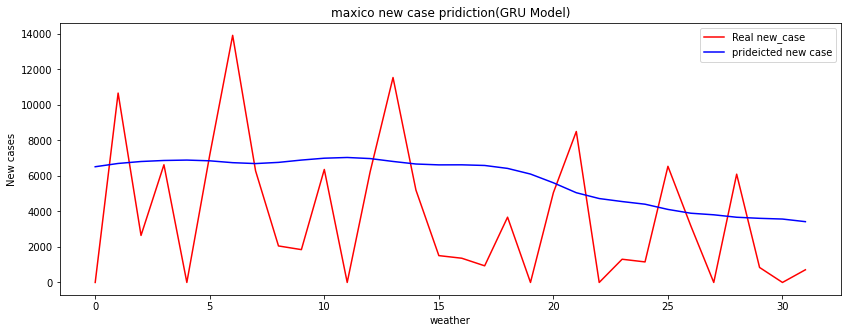

In [ ]:

plt.figure(figsize=(14,5))
plt.plot(mx_gru_y_test, color = 'red', label = 'Real new_case')
plt.plot(mx_gru_y_pred, color='blue', label = 'prideicted new case')
plt.title('maxico new case pridiction(GRU Model)')
plt.xlabel('weather')
plt.ylabel('New cases')
plt.legend()
plt.show()

In [ ]:
# indonasia data model LSTM

In [ ]:
new_indo_seasons=indo_seasons[['date', 'new_cases','T2M']]

In [ ]:
indo_data_training=new_indo_seasons[new_indo_seasons['date']<='2022-01-22'].copy()



In [ ]:
indo_data_testing=new_indo_seasons[new_indo_seasons['date']>='2022-01-22'].copy()

In [ ]:
indo_training_data=indo_data_training.drop(['date'],axis=1)

In [ ]:
indo_scaler=MinMaxScaler()
indo_training_data=indo_scaler.fit_transform(indo_training_data)

In [ ]:
indo_X_train=[]
indo_y_train=[]


In [ ]:
for i in range(30, indo_training_data.shape[0]):
    indo_X_train.append(indo_training_data[i-30:i])
    indo_y_train.append(indo_training_data[i,0])
    

In [ ]:
indo_X_train,indo_y_train=np.array(indo_X_train), np.array(indo_y_train)

In [ ]:
indo_regressior= Sequential()
indo_regressior.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(indo_X_train.shape[1],2)))
indo_regressior.add(Dropout(0.2))

indo_regressior.add(LSTM(units=60, activation='relu', return_sequences=True))
indo_regressior.add(Dropout(0.2))

indo_regressior.add(LSTM(units=80, activation='relu', return_sequences=True))
indo_regressior.add(Dropout(0.2))

#regressior.add(LSTM(units=100, activation='relu', return_sequences=True))
#regressior.add(Dropout(0.2))

indo_regressior.add(LSTM(units=120, activation='relu'))
indo_regressior.add(Dropout(0.2))

indo_regressior.add(Dense(units=1))


In [ ]:
indo_regressior.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
indo_regressior.fit(mx_X_train,mx_y_train,epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 7s 93ms/step - loss: 0.0072
Epoch 2/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0064
Epoch 3/100
21/21 [==============================] - 2s 91ms/step - loss: 0.0061
Epoch 4/100
21/21 [==============================] - 2s 90ms/step - loss: 0.0057
Epoch 5/100
21/21 [==============================] - 2s 90ms/step - loss: 0.0056
Epoch 6/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0058
Epoch 7/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0056
Epoch 8/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0052
Epoch 9/100
21/21 [==============================] - 2s 90ms/step - loss: 0.0052
Epoch 10/100
21/21 [==============================] - 2s 93ms/step - loss: 0.0051
Epoch 11/100
21/21 [==============================] - 2s 90ms/step - loss: 0.0047
Epoch 12/100
21/21 [==============================] - 2s 91ms/step - loss: 0.0052
Epoch 13/100
21/21 [=====

In [ ]:
indo_past_30_days= indo_data_training.tail(30)

In [ ]:
indo_df = indo_past_30_days.append(indo_data_testing, ignore_index=True)
indo_df

,date,new_cases,T2M
0,2021-12-24,204.0,21.84
1,2021-12-25,255.0,22.05
2,2021-12-26,0.0,22.68
3,2021-12-27,212.0,21.77
4,2021-12-28,278.0,22.84
...,...,...,...
60,2022-02-21,34418.0,20.90
61,2022-02-22,57491.0,21.70
62,2022-02-23,61488.0,22.22
63,2022-02-24,57426.0,22.01


In [ ]:
indo_df= indo_df.drop(['date'],axis=1)

In [ ]:
indo_inputs= indo_scaler.transform(indo_df)

In [ ]:
indo_X_test =[]
indo_y_test =[]

for i in range(30,indo_inputs.shape[0]):
    indo_X_test.append(indo_inputs[i-30:i])
    indo_y_test.append(indo_inputs[i,0])

In [ ]:
indo_X_test, indo_y_test = np.array(indo_X_test), np.array(indo_y_test)
indo_X_test.shape, indo_y_test.shape

((35, 30, 2), (35,))

In [ ]:
indo_y_pred= indo_regressior.predict(indo_X_test)

In [ ]:
indo_y_pred, indo_y_test

(array([[0.04277562],
        [0.04852192],
        [0.05695414],
        [0.06694745],
        [0.07829741],
        [0.09392495],
        [0.11489418],
        [0.14040369],
        [0.16840015],
        [0.19630603],
        [0.22140189],
        [0.24212372],
        [0.25841904],
        [0.27293417],
        [0.28894293],
        [0.30822787],
        [0.33160704],
        [0.35598606],
        [0.38005397],
        [0.40291086],
        [0.42318544],
        [0.4387363 ],
        [0.45004234],
        [0.4565489 ],
        [0.45607558],
        [0.44915056],
        [0.43984213],
        [0.43245235],
        [0.42847204],
        [0.42668623],
        [0.4235122 ],
        [0.4138913 ],
        [0.39604458],
        [0.3730227 ],
        [0.34803662]], dtype=float32),
 array([0.05646881, 0.05153549, 0.05157073, 0.08594535, 0.12350899,
        0.14230844, 0.17451592, 0.20416865, 0.21886287, 0.17944923,
        0.28227355, 0.31529151, 0.47918318, 0.56752471, 0.59427031,
        0

In [ ]:
indo_scaler.scale_

array([1.76189721e-05, 2.31481481e-01])

In [ ]:
indo_scale=1/6.16142945e-05
indo_scale

16230.00000430095

In [ ]:
indo_y_pred= indo_y_pred*indo_scale
indo_y_test= indo_y_test*indo_scale

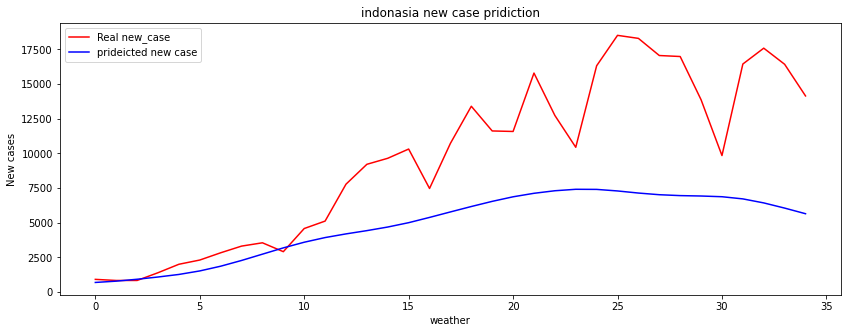

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(indo_y_test, color = 'red', label = 'Real new_case')
plt.plot(indo_y_pred, color='blue', label = 'prideicted new case')
plt.title('indonasia new case pridiction')
plt.xlabel('weather')
plt.ylabel('New cases')
plt.legend()
plt.show()


In [ ]:
#Indonasia GRU mode

In [ ]:
indo_gru_new_seasons=indo_seasons[['date', 'new_cases','T2M']]

In [ ]:
indo_gru_data_training=indo_gru_new_seasons[indo_gru_new_seasons['date']<='2022-01-22'].copy()

In [ ]:
indo_gru_data_testing=indo_gru_new_seasons[indo_gru_new_seasons['date']>='2022-01-22'].copy()

In [ ]:
indo_gru_training_data=indo_gru_data_training.drop(['date'],axis=1)

In [ ]:
indo_gru_scaler=MinMaxScaler()
indo_gru_training_data=indo_gru_scaler.fit_transform(indo_gru_training_data)

In [ ]:
indo_gru_X_train=[]
indo_gru_y_train=[]

In [ ]:
for i in range(30, indo_gru_training_data.shape[0]):
    indo_gru_X_train.append(indo_gru_training_data[i-30:i])
    indo_gru_y_train.append(indo_gru_training_data[i,0])

In [ ]:
indo_gru_X_train,indo_gru_y_train=np.array(indo_gru_X_train), np.array(indo_gru_y_train)

In [ ]:
indo_gru_regressior= Sequential()
indo_gru_regressior.add(layers.GRU(units=50, activation='relu', recurrent_activation='sigmoid',  return_sequences=True, input_shape=(indo_gru_X_train.shape[1],2)))
indo_gru_regressior.add(layers.Dropout(0.2))

indo_gru_regressior.add(layers.GRU(units=60, activation='relu', return_sequences=True))
indo_gru_regressior.add(layers.Dropout(0.2))

indo_gru_regressior.add(layers.GRU(units=80, activation='relu', return_sequences=True))
indo_gru_regressior.add(layers.Dropout(0.2))

#gru_regressior.add(layers.GRU(units=100, activation='relu', return_sequences=True))
#gru_regressior.add(layers.Dropout(0.2))

indo_gru_regressior.add(layers.GRU(units=120, activation='relu'))
indo_gru_regressior.add(layers.Dropout(0.2))

indo_gru_regressior.add(layers.Dense(units=1))


In [ ]:
indo_gru_regressior.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
indo_gru_regressior.fit(indo_gru_X_train,indo_gru_y_train,epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 8s 85ms/step - loss: 0.0230
Epoch 2/100
21/21 [==============================] - 2s 86ms/step - loss: 0.0067
Epoch 3/100
21/21 [==============================] - 2s 84ms/step - loss: 0.0068
Epoch 4/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0060
Epoch 5/100
21/21 [==============================] - 2s 81ms/step - loss: 0.0053
Epoch 6/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0051
Epoch 7/100
21/21 [==============================] - 2s 86ms/step - loss: 0.0059
Epoch 8/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0052
Epoch 9/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0044
Epoch 10/100
21/21 [==============================] - 2s 81ms/step - loss: 0.0044
Epoch 11/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0042
Epoch 12/100
21/21 [==============================] - 2s 84ms/step - loss: 0.0041
Epoch 13/100
21/21 [=====

In [ ]:
indo_gru_past_30_days= indo_gru_data_training.tail(30)

In [ ]:
indo_gru_df = indo_gru_past_30_days.append(indo_gru_data_testing, ignore_index=True)

In [ ]:
indo_gru_df= indo_gru_df.drop(['date'],axis=1)

In [ ]:
indo_gru_inputs= indo_gru_scaler.transform(indo_gru_df)

In [ ]:
indo_gru_X_test =[]
indo_gru_y_test =[]

for i in range(30,indo_gru_inputs.shape[0]):
    indo_gru_X_test.append(indo_gru_inputs[i-30:i])
    indo_gru_y_test.append(indo_gru_inputs[i,0])

In [ ]:
indo_gru_X_test, indo_gru_y_test = np.array(indo_gru_X_test), np.array(indo_gru_y_test)
indo_gru_X_test.shape, indo_gru_y_test.shape

((35, 30, 2), (35,))

In [ ]:
indo_gru_y_pred= indo_gru_regressior.predict(indo_gru_X_test)

In [ ]:
indo_gru_scaler.scale_

array([1.76189721e-05, 2.31481481e-01])

In [ ]:
indo_gru_scale=1/6.16142945e-05
indo_gru_scale

16230.00000430095

In [ ]:
indo_gru_y_pred= indo_gru_y_pred*indo_gru_scale
indo_gru_y_test= indo_gru_y_test*indo_gru_scale

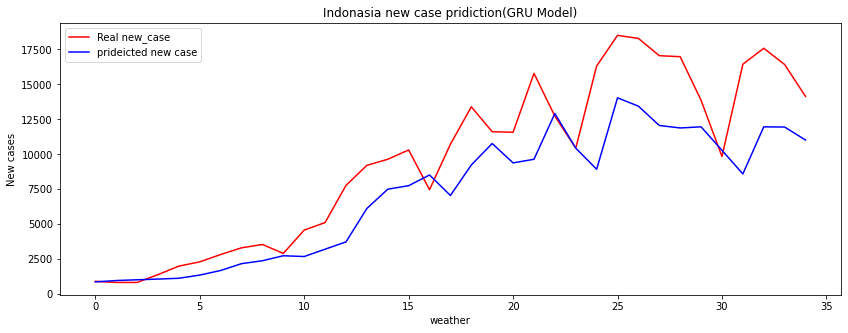

In [ ]:

plt.figure(figsize=(14,5))
plt.plot(indo_gru_y_test, color = 'red', label = 'Real new_case')
plt.plot(indo_gru_y_pred, color='blue', label = 'prideicted new case')
plt.title('Indonasia new case pridiction(GRU Model)')
plt.xlabel('weather')
plt.ylabel('New cases')
plt.legend()
plt.show()

In [ ]:
# philipine  data model LSTM

In [ ]:
new_ph_seasons=ph_seasons[['date', 'new_cases','T2M']]

In [ ]:
ph_data_training=new_ph_seasons[new_ph_seasons['date']<='2022-01-22'].copy()



In [ ]:
ph_data_testing=new_ph_seasons[new_ph_seasons['date']>='2022-01-22'].copy()

In [ ]:
ph_training_data=ph_data_training.drop(['date'],axis=1)

In [ ]:
ph_scaler=MinMaxScaler()
ph_training_data=ph_scaler.fit_transform(ph_training_data)

In [ ]:
ph_X_train=[]
ph_y_train=[]


In [ ]:
for i in range(30, ph_training_data.shape[0]):
    ph_X_train.append(ph_training_data[i-30:i])
    ph_y_train.append(ph_training_data[i,0])
    

In [ ]:
ph_X_train,ph_y_train=np.array(ph_X_train), np.array(ph_y_train)

In [ ]:
ph_regressior= Sequential()
ph_regressior.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(ph_X_train.shape[1],2)))
ph_regressior.add(Dropout(0.2))

ph_regressior.add(LSTM(units=60, activation='relu', return_sequences=True))
ph_regressior.add(Dropout(0.2))

ph_regressior.add(LSTM(units=80, activation='relu', return_sequences=True))
ph_regressior.add(Dropout(0.2))

#regressior.add(LSTM(units=100, activation='relu', return_sequences=True))
#regressior.add(Dropout(0.2))

ph_regressior.add(LSTM(units=120, activation='relu'))
ph_regressior.add(Dropout(0.2))

ph_regressior.add(Dense(units=1))


In [ ]:
ph_regressior.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
ph_regressior.fit(ph_X_train,ph_y_train,epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 7s 93ms/step - loss: 0.0296
Epoch 2/100
21/21 [==============================] - 2s 96ms/step - loss: 0.0178
Epoch 3/100
21/21 [==============================] - 2s 95ms/step - loss: 0.0142
Epoch 4/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0104
Epoch 5/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0083
Epoch 6/100
21/21 [==============================] - 2s 94ms/step - loss: 0.0074
Epoch 7/100
21/21 [==============================] - 2s 90ms/step - loss: 0.0067
Epoch 8/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0054
Epoch 9/100
21/21 [==============================] - 2s 93ms/step - loss: 0.0058
Epoch 10/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0052
Epoch 11/100
21/21 [==============================] - 2s 94ms/step - loss: 0.0046
Epoch 12/100
21/21 [==============================] - 2s 94ms/step - loss: 0.0053
Epoch 13/100
21/21 [=====

In [ ]:
ph_past_30_days= ph_data_training.tail(30)

In [ ]:
ph_df = ph_past_30_days.append(ph_data_testing, ignore_index=True)
ph_df

,date,new_cases,T2M
0,2021-12-24,129.0,27.58
1,2021-12-25,349.0,27.58
2,2021-12-26,259.0,27.52
3,2021-12-27,152.0,26.87
4,2021-12-28,319.0,26.69
...,...,...,...
60,2022-02-21,1323.0,27.03
61,2022-02-22,758.0,27.12
62,2022-02-23,1425.0,27.25
63,2022-02-24,1633.0,27.20


In [ ]:
ph_df= ph_df.drop(['date'],axis=1)

In [ ]:
ph_inputs= ph_scaler.transform(ph_df)

In [ ]:
ph_X_test =[]
ph_y_test =[]

for i in range(30,ph_inputs.shape[0]):
    ph_X_test.append(ph_inputs[i-30:i])
    ph_y_test.append(ph_inputs[i,0])

In [ ]:
ph_X_test, ph_y_test = np.array(ph_X_test), np.array(ph_y_test)
ph_X_test.shape, ph_y_test.shape

((35, 30, 2), (35,))

In [ ]:
ph_y_pred= ph_regressior.predict(ph_X_test)

In [ ]:
ph_y_pred, ph_y_test

(array([[0.7608367 ],
        [0.7561746 ],
        [0.7509945 ],
        [0.7444714 ],
        [0.73592603],
        [0.72515893],
        [0.7118148 ],
        [0.69625086],
        [0.679824  ],
        [0.66134113],
        [0.6420545 ],
        [0.61658275],
        [0.5900097 ],
        [0.57522696],
        [0.57232267],
        [0.5677391 ],
        [0.5682109 ],
        [0.53610003],
        [0.4796122 ],
        [0.4152544 ],
        [0.3395102 ],
        [0.27025568],
        [0.21930675],
        [0.19197081],
        [0.17234983],
        [0.14864284],
        [0.12536535],
        [0.10629912],
        [0.08961381],
        [0.07795811],
        [0.07014515],
        [0.06615338],
        [0.06441388],
        [0.06169535],
        [0.05835973]], dtype=float32),
 array([0.78314803, 0.76387173, 0.63900041, 0.45241404, 0.40240889,
        0.46692917, 0.46409821, 0.44507927, 0.43424439, 0.37345584,
        0.24325715, 0.19616018, 0.20980029, 0.21952852, 0.19193947,
        0

In [ ]:
ph_scaler.scale_

array([2.57360511e-05, 1.74825175e-01])

In [ ]:
ph_scale=1/6.16142945e-05
ph_scale

16230.00000430095

In [ ]:
ph_y_pred= ph_y_pred*ph_scale
ph_y_test= ph_y_test*ph_scale

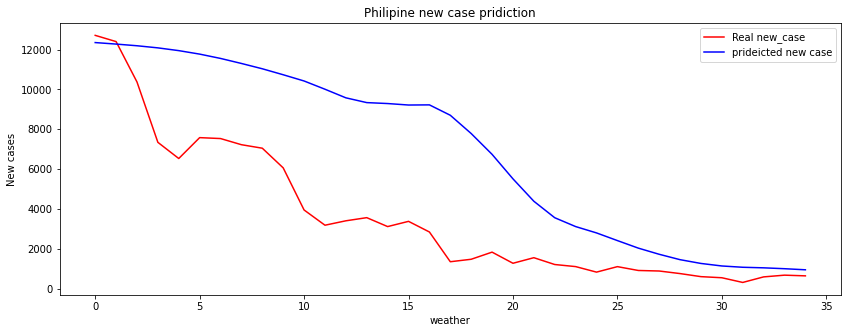

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(ph_y_test, color = 'red', label = 'Real new_case')
plt.plot(ph_y_pred, color='blue', label = 'prideicted new case')
plt.title('Philipine new case pridiction')
plt.xlabel('weather')
plt.ylabel('New cases')
plt.legend()
plt.show()


In [ ]:
#Indonasia GRU mode

In [ ]:
ph_gru_new_seasons=ph_seasons[['date', 'new_cases','T2M']]

In [ ]:
ph_gru_data_training=ph_gru_new_seasons[ph_gru_new_seasons['date']<='2022-01-22'].copy()

In [ ]:
ph_gru_data_testing=ph_gru_new_seasons[ph_gru_new_seasons['date']>='2022-01-22'].copy()

In [ ]:
ph_gru_training_data=ph_gru_data_training.drop(['date'],axis=1)

In [ ]:
ph_gru_scaler=MinMaxScaler()
ph_gru_training_data=ph_gru_scaler.fit_transform(ph_gru_training_data)

In [ ]:
ph_gru_X_train=[]
ph_gru_y_train=[]

In [ ]:
for i in range(30, ph_gru_training_data.shape[0]):
    ph_gru_X_train.append(ph_gru_training_data[i-30:i])
    ph_gru_y_train.append(ph_gru_training_data[i,0])

In [ ]:
ph_gru_X_train,ph_gru_y_train=np.array(ph_gru_X_train), np.array(ph_gru_y_train)

In [ ]:
ph_gru_regressior= Sequential()
ph_gru_regressior.add(layers.GRU(units=50, activation='relu', recurrent_activation='sigmoid',  return_sequences=True, input_shape=(ph_gru_X_train.shape[1],2)))
ph_gru_regressior.add(layers.Dropout(0.2))

ph_gru_regressior.add(layers.GRU(units=60, activation='relu', return_sequences=True))
ph_gru_regressior.add(layers.Dropout(0.2))

ph_gru_regressior.add(layers.GRU(units=80, activation='relu', return_sequences=True))
ph_gru_regressior.add(layers.Dropout(0.2))

#gru_regressior.add(layers.GRU(units=100, activation='relu', return_sequences=True))
#gru_regressior.add(layers.Dropout(0.2))

ph_gru_regressior.add(layers.GRU(units=120, activation='relu'))
ph_gru_regressior.add(layers.Dropout(0.2))

ph_gru_regressior.add(layers.Dense(units=1))


In [ ]:
ph_gru_regressior.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
ph_gru_regressior.fit(ph_gru_X_train,ph_gru_y_train,epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 7s 82ms/step - loss: 0.0269
Epoch 2/100
21/21 [==============================] - 2s 84ms/step - loss: 0.0088
Epoch 3/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0064
Epoch 4/100
21/21 [==============================] - 2s 81ms/step - loss: 0.0061
Epoch 5/100
21/21 [==============================] - 2s 81ms/step - loss: 0.0047
Epoch 6/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0051
Epoch 7/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0045
Epoch 8/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0035
Epoch 9/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0042
Epoch 10/100
21/21 [==============================] - 2s 81ms/step - loss: 0.0041
Epoch 11/100
21/21 [==============================] - 2s 81ms/step - loss: 0.0044
Epoch 12/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0040
Epoch 13/100
21/21 [=====

In [ ]:
ph_gru_past_30_days= ph_gru_data_training.tail(30)

In [ ]:
ph_gru_df = ph_gru_past_30_days.append(ph_gru_data_testing, ignore_index=True)

In [ ]:
ph_gru_df= ph_gru_df.drop(['date'],axis=1)

In [ ]:
ph_gru_inputs= ph_gru_scaler.transform(ph_gru_df)

In [ ]:
ph_gru_X_test =[]
ph_gru_y_test =[]

for i in range(30,ph_gru_inputs.shape[0]):
    ph_gru_X_test.append(ph_gru_inputs[i-30:i])
    ph_gru_y_test.append(ph_gru_inputs[i,0])

In [ ]:
ph_gru_X_test, ph_gru_y_test = np.array(ph_gru_X_test), np.array(ph_gru_y_test)
ph_gru_X_test.shape, ph_gru_y_test.shape

((35, 30, 2), (35,))

In [ ]:
ph_gru_y_pred= ph_gru_regressior.predict(ph_gru_X_test)

In [ ]:
ph_gru_scaler.scale_

array([2.57360511e-05, 1.74825175e-01])

In [ ]:
ph_gru_scale=1/6.16142945e-05
ph_gru_scale

16230.00000430095

In [ ]:
ph_gru_y_pred= ph_gru_y_pred*ph_gru_scale
ph_gru_y_test= ph_gru_y_test*ph_gru_scale

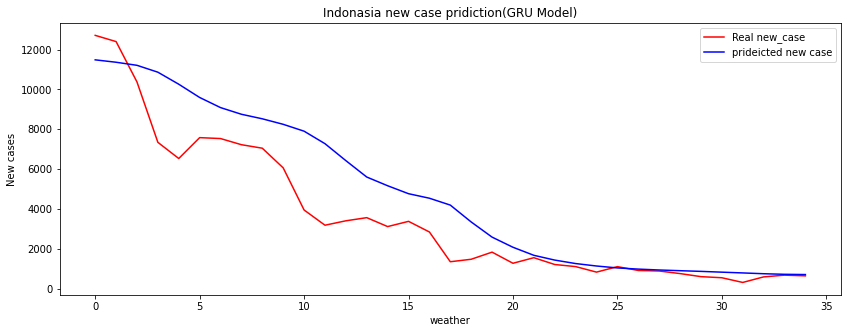

In [ ]:

plt.figure(figsize=(14,5))
plt.plot(ph_gru_y_test, color = 'red', label = 'Real new_case')
plt.plot(ph_gru_y_pred, color='blue', label = 'prideicted new case')
plt.title('Indonasia new case pridiction(GRU Model)')
plt.xlabel('weather')
plt.ylabel('New cases')
plt.legend()
plt.show()

In [ ]:
# philipine  data model LSTM

In [ ]:
new_vt_seasons=vt_seasons[['date', 'new_cases','T2M']]

In [ ]:
vt_data_training=new_vt_seasons[new_vt_seasons['date']<='2022-01-22'].copy()



In [ ]:
vt_data_testing=new_vt_seasons[new_vt_seasons['date']>='2022-01-22'].copy()

In [ ]:
vt_training_data=vt_data_training.drop(['date'],axis=1)

In [ ]:
vt_scaler=MinMaxScaler()
vt_training_data=vt_scaler.fit_transform(vt_training_data)

In [ ]:
vt_X_train=[]
vt_y_train=[]


In [ ]:
for i in range(30, vt_training_data.shape[0]):
    vt_X_train.append(vt_training_data[i-30:i])
    vt_y_train.append(vt_training_data[i,0])
    

In [ ]:
vt_X_train,vt_y_train=np.array(vt_X_train), np.array(vt_y_train)

In [ ]:
vt_regressior= Sequential()
vt_regressior.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(vt_X_train.shape[1],2)))
vt_regressior.add(Dropout(0.2))

vt_regressior.add(LSTM(units=60, activation='relu', return_sequences=True))
vt_regressior.add(Dropout(0.2))

vt_regressior.add(LSTM(units=80, activation='relu', return_sequences=True))
vt_regressior.add(Dropout(0.2))

#regressior.add(LSTM(units=100, activation='relu', return_sequences=True))
#regressior.add(Dropout(0.2))

vt_regressior.add(LSTM(units=120, activation='relu'))
vt_regressior.add(Dropout(0.2))

vt_regressior.add(Dense(units=1))


In [ ]:
vt_regressior.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
vt_regressior.fit(vt_X_train,vt_y_train,epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 7s 93ms/step - loss: 0.0205
Epoch 2/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0071
Epoch 3/100
21/21 [==============================] - 2s 93ms/step - loss: 0.0106
Epoch 4/100
21/21 [==============================] - 2s 95ms/step - loss: 0.0063
Epoch 5/100
21/21 [==============================] - 2s 92ms/step - loss: 0.0071
Epoch 6/100
21/21 [==============================] - 2s 91ms/step - loss: 0.0061
Epoch 7/100
21/21 [==============================] - 2s 94ms/step - loss: 0.0059
Epoch 8/100
21/21 [==============================] - 2s 90ms/step - loss: 0.0056
Epoch 9/100
21/21 [==============================] - 2s 90ms/step - loss: 0.0056
Epoch 10/100
21/21 [==============================] - 2s 93ms/step - loss: 0.0059
Epoch 11/100
21/21 [==============================] - 2s 90ms/step - loss: 0.0051
Epoch 12/100
21/21 [==============================] - 2s 90ms/step - loss: 0.0048
Epoch 13/100
21/21 [=====

In [ ]:
vt_past_30_days= vt_data_training.tail(30)

In [ ]:
vt_df = vt_past_30_days.append(vt_data_testing, ignore_index=True)
vt_df

,date,new_cases,T2M
0,2021-12-24,16157.0,20.94
1,2021-12-25,15586.0,20.83
2,2021-12-26,15218.0,21.50
3,2021-12-27,14872.0,21.22
4,2021-12-28,14440.0,21.08
...,...,...,...
57,2022-02-18,42439.0,23.37
58,2022-02-19,54830.0,24.43
59,2022-02-20,47200.0,21.64
60,2022-02-21,46880.0,18.63


In [ ]:
vt_df= vt_df.drop(['date'],axis=1)

In [ ]:
vt_inputs= vt_scaler.transform(vt_df)

In [ ]:
vt_X_test =[]
vt_y_test =[]

for i in range(30,vt_inputs.shape[0]):
    vt_X_test.append(vt_inputs[i-30:i])
    vt_y_test.append(vt_inputs[i,0])

In [ ]:
vt_X_test, vt_y_test = np.array(vt_X_test), np.array(vt_y_test)
vt_X_test.shape, vt_y_test.shape

((32, 30, 2), (32,))

In [ ]:
vt_y_pred= vt_regressior.predict(vt_X_test)

In [ ]:
vt_y_pred, vt_y_test

(array([[0.44351894],
        [0.44404665],
        [0.44599602],
        [0.4485572 ],
        [0.4514014 ],
        [0.45419505],
        [0.4565223 ],
        [0.45805156],
        [0.45873156],
        [0.46028382],
        [0.46124202],
        [0.46010846],
        [0.45501786],
        [0.44476378],
        [0.4308769 ],
        [0.41582757],
        [0.4022366 ],
        [0.3918104 ],
        [0.3855298 ],
        [0.38431555],
        [0.38799334],
        [0.39664352],
        [0.4094265 ],
        [0.42539147],
        [0.44340354],
        [0.4620545 ],
        [0.4831936 ],
        [0.50318134],
        [0.5234299 ],
        [0.5442924 ],
        [0.56527525],
        [0.5856914 ]], dtype=float32),
 array([0.40138506, 0.3827558 , 0.36701421, 0.40230502, 0.40769703,
        0.40189615, 0.38150363, 0.38715118, 0.76065624, 0.32387816,
        0.28168762, 0.22344884, 0.21979454, 0.29627926, 0.31099867,
        0.36062557, 0.42969948, 0.55987427, 0.6121844 , 0.66523561,
       

In [ ]:
vt_scaler.scale_

array([2.55545334e-05, 6.38977636e-02])

In [ ]:
vt_scale=1/6.16142945e-05
vt_scale

16230.00000430095

In [ ]:
vt_y_pred= vt_y_pred*vt_scale
vt_y_test= vt_y_test*vt_scale

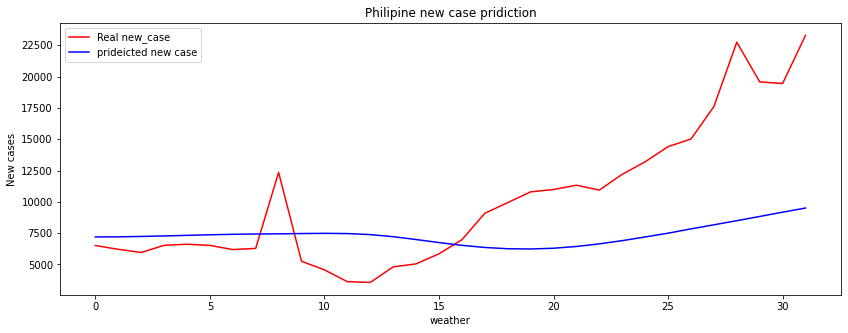

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(vt_y_test, color = 'red', label = 'Real new_case')
plt.plot(vt_y_pred, color='blue', label = 'prideicted new case')
plt.title('Philipine new case pridiction')
plt.xlabel('weather')
plt.ylabel('New cases')
plt.legend()
plt.show()


In [ ]:
#Indonasia GRU mode

In [ ]:
vt_gru_new_seasons=vt_seasons[['date', 'new_cases','T2M']]

In [ ]:
vt_gru_data_training=vt_gru_new_seasons[vt_gru_new_seasons['date']<='2022-01-22'].copy()

In [ ]:
vt_gru_data_testing=vt_gru_new_seasons[vt_gru_new_seasons['date']>='2022-01-22'].copy()

In [ ]:
vt_gru_training_data=vt_gru_data_training.drop(['date'],axis=1)

In [ ]:
vt_gru_scaler=MinMaxScaler()
vt_gru_training_data=vt_gru_scaler.fit_transform(vt_gru_training_data)

In [ ]:
vt_gru_X_train=[]
vt_gru_y_train=[]

In [ ]:
for i in range(30, vt_gru_training_data.shape[0]):
    vt_gru_X_train.append(vt_gru_training_data[i-30:i])
    vt_gru_y_train.append(vt_gru_training_data[i,0])

In [ ]:
vt_gru_X_train,vt_gru_y_train=np.array(vt_gru_X_train), np.array(vt_gru_y_train)

In [ ]:
vt_gru_regressior= Sequential()
vt_gru_regressior.add(layers.GRU(units=50, activation='relu', recurrent_activation='sigmoid',  return_sequences=True, input_shape=(vt_gru_X_train.shape[1],2)))
vt_gru_regressior.add(layers.Dropout(0.2))

vt_gru_regressior.add(layers.GRU(units=60, activation='relu', return_sequences=True))
vt_gru_regressior.add(layers.Dropout(0.2))

vt_gru_regressior.add(layers.GRU(units=80, activation='relu', return_sequences=True))
vt_gru_regressior.add(layers.Dropout(0.2))

#gru_regressior.add(layers.GRU(units=100, activation='relu', return_sequences=True))
#gru_regressior.add(layers.Dropout(0.2))

vt_gru_regressior.add(layers.GRU(units=120, activation='relu'))
vt_gru_regressior.add(layers.Dropout(0.2))

vt_gru_regressior.add(layers.Dense(units=1))


In [ ]:
vt_gru_regressior.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
vt_gru_regressior.fit(vt_gru_X_train,vt_gru_y_train,epochs=100, batch_size=32)

Epoch 1/100
21/21 [==============================] - 7s 84ms/step - loss: 0.0171
Epoch 2/100
21/21 [==============================] - 2s 86ms/step - loss: 0.0048
Epoch 3/100
21/21 [==============================] - 2s 81ms/step - loss: 0.0042
Epoch 4/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0044
Epoch 5/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0044
Epoch 6/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0041
Epoch 7/100
21/21 [==============================] - 2s 81ms/step - loss: 0.0039
Epoch 8/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0036
Epoch 9/100
21/21 [==============================] - 2s 83ms/step - loss: 0.0039
Epoch 10/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0044
Epoch 11/100
21/21 [==============================] - 2s 82ms/step - loss: 0.0038
Epoch 12/100
21/21 [==============================] - 2s 81ms/step - loss: 0.0058
Epoch 13/100
21/21 [=====

In [ ]:
vt_gru_past_30_days= vt_gru_data_training.tail(30)

In [ ]:
vt_gru_df = vt_gru_past_30_days.append(vt_gru_data_testing, ignore_index=True)

In [ ]:
vt_gru_df= vt_gru_df.drop(['date'],axis=1)

In [ ]:
vt_gru_inputs= vt_gru_scaler.transform(vt_gru_df)

In [ ]:
vt_gru_X_test =[]
vt_gru_y_test =[]

for i in range(30,vt_gru_inputs.shape[0]):
    vt_gru_X_test.append(vt_gru_inputs[i-30:i])
    vt_gru_y_test.append(vt_gru_inputs[i,0])

In [ ]:
vt_gru_X_test, vt_gru_y_test = np.array(vt_gru_X_test), np.array(vt_gru_y_test)
vt_gru_X_test.shape, vt_gru_y_test.shape

((32, 30, 2), (32,))

In [ ]:
vt_gru_y_pred= vt_gru_regressior.predict(vt_gru_X_test)

In [ ]:
vt_gru_scaler.scale_

array([2.55545334e-05, 6.38977636e-02])

In [ ]:
vt_gru_scale=1/6.16142945e-05
vt_gru_scale

16230.00000430095

In [ ]:
vt_gru_y_pred= vt_gru_y_pred*vt_gru_scale
vt_gru_y_test= vt_gru_y_test*vt_gru_scale

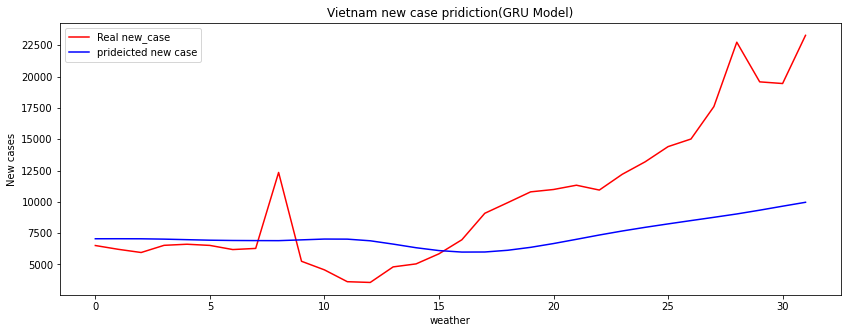

In [ ]:

plt.figure(figsize=(14,5))
plt.plot(vt_gru_y_test, color = 'red', label = 'Real new_case')
plt.plot(vt_gru_y_pred, color='blue', label = 'prideicted new case')
plt.title('Vietnam new case pridiction(GRU Model)')
plt.xlabel('weather')
plt.ylabel('New cases')
plt.legend()
plt.show()